# Machine Learning Project - Big5 career path

In [757]:
### Create a career path guide based on the psychological type


## Import

In [758]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import percentileofscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st



## DataFrames

In [759]:
# df_career - DataFrame containing career paths
df_career = pd.read_csv('data/data_career.csv')
df_career.head()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher


In [760]:
df_career

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning,Career
0,5.45,8.67,3.45,5.34,4.23,9.23,4.56,6.78,7.89,6.12,Accountant
1,8.78,5.67,4.56,6.45,4.23,5.12,8.45,7.89,6.34,6.01,Graphic Designer
2,6.12,6.78,9.34,7.56,5.01,6.23,4.23,6.45,6.67,8.45,Salesperson
3,9.12,8.78,4.23,5.67,4.56,7.89,5.34,6.45,9.34,7.67,Research Scientist
4,6.45,7.56,5.67,9.12,4.23,5.34,4.01,6.23,5.78,8.67,Teacher
...,...,...,...,...,...,...,...,...,...,...,...
100,7.67,8.23,6.01,9.12,5.45,4.45,2.89,3.12,4.67,8.34,Foreign Service Officer
101,2.67,8.78,7.67,8.45,6.45,4.45,2.89,3.12,4.67,5.45,Customs and Border Protection Officer
102,6.78,8.67,4.23,5.23,4.67,8.23,7.67,6.01,7.45,5.45,Civil Engineer
103,7.34,7.67,4.23,5.23,4.67,9.34,8.45,6.78,8.12,5.67,Robotics Engineer


In [761]:
# Read using tab delimiter
df = pd.read_csv('data/data.csv', delimiter='\t') 
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [762]:
"""	
Questions in the dataset:
E1	I am the life of the party.
E2	I don't talk a lot.
E3	I feel comfortable around people.
E4	I keep in the background.
E5	I start conversations.
E6	I have little to say.
E7	I talk to a lot of different people at parties.
E8	I don't like to draw attention to myself.
E9	I don't mind being the center of attention.
E10	I am quiet around strangers.
N1	I get stressed out easily.
N2	I am relaxed most of the time.
N3	I worry about things.
N4	I seldom feel blue.
N5	I am easily disturbed.
N6	I get upset easily.
N7	I change my mood a lot.
N8	I have frequent mood swings.
N9	I get irritated easily.
N10	I often feel blue.
A1	I feel little concern for others.
A2	I am interested in people.
A3	I insult people.
A4	I sympathize with others' feelings.
A5	I am not interested in other people's problems.
A6	I have a soft heart.
A7	I am not really interested in others.
A8	I take time out for others.
A9	I feel others' emotions.
A10	I make people feel at ease.
C1	I am always prepared.
C2	I leave my belongings around.
C3	I pay attention to details.
C4	I make a mess of things.
C5	I get chores done right away.
C6	I often forget to put things back in their proper place.
C7	I like order.
C8	I shirk my duties.
C9	I follow a schedule.
C10	I am exacting in my work.
O1	I have a rich vocabulary.
O2	I have difficulty understanding abstract ideas.
O3	I have a vivid imagination.
O4	I am not interested in abstract ideas.
O5	I have excellent ideas.
O6	I do not have a good imagination.
O7	I am quick to understand things.
O8	I use difficult words.
O9	I spend time reflecting on things.
O10	I am full of ideas.

"""

"\t\nQuestions in the dataset:\nE1\tI am the life of the party.\nE2\tI don't talk a lot.\nE3\tI feel comfortable around people.\nE4\tI keep in the background.\nE5\tI start conversations.\nE6\tI have little to say.\nE7\tI talk to a lot of different people at parties.\nE8\tI don't like to draw attention to myself.\nE9\tI don't mind being the center of attention.\nE10\tI am quiet around strangers.\nN1\tI get stressed out easily.\nN2\tI am relaxed most of the time.\nN3\tI worry about things.\nN4\tI seldom feel blue.\nN5\tI am easily disturbed.\nN6\tI get upset easily.\nN7\tI change my mood a lot.\nN8\tI have frequent mood swings.\nN9\tI get irritated easily.\nN10\tI often feel blue.\nA1\tI feel little concern for others.\nA2\tI am interested in people.\nA3\tI insult people.\nA4\tI sympathize with others' feelings.\nA5\tI am not interested in other people's problems.\nA6\tI have a soft heart.\nA7\tI am not really interested in others.\nA8\tI take time out for others.\nA9\tI feel others' emo

In [763]:
"""	
race - 1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 7=Indigenous Australian, 8=Native American, 9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 10=Pacific (Polynesian, Micronesian, etc), 11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other (0=missed)
age	- entered as text (individuals reporting age < 13 were not recorded)
engnat	- Response to "is English your native language?". 1=yes, 2=no (0=missed)
gender	- Chosen from a drop down menu. 1=Male, 2=Female, 3=Other (0=missed)
hand	- "What hand do you use to write with?". 1=Right, 2=Left, 3=Both (0=missed)

"""	

'\t\nrace - 1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 7=Indigenous Australian, 8=Native American, 9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 10=Pacific (Polynesian, Micronesian, etc), 11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other (0=missed)\nage\t- entered as text (individuals reporting age < 13 were not recorded)\nengnat\t- Response to "is English your native language?". 1=yes, 2=no (0=missed)\ngender\t- Chosen from a drop down menu. 1=Male, 2=Female, 3=Other (0=missed)\nhand\t- "What hand do you use to write with?". 1=Right, 2=Left, 3=Both (0=missed)\n\n'

In [764]:
o_columns = ['O' + str(i) for i in range(1, 11)]
df_o = df[['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country'] + o_columns]

In [765]:
e_columns = ['E' + str(i) for i in range(1, 11)]
df_e = df[['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country'] + e_columns]

In [766]:
n_columns = ['N' + str(i) for i in range(1, 11)]
df_n = df[['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country'] + n_columns]

In [767]:
a_columns = ['A' + str(i) for i in range(1, 11)]
df_a = df[['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country'] + a_columns]

In [768]:
c_columns = ['C' + str(i) for i in range(1, 11)]
df_c = df[['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country'] + c_columns]

## EDA

### DataFrame - df

In [769]:
df.shape

(19719, 57)

In [770]:
df.info

<bound method DataFrame.info of        race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  \
0         3   53       1       1     1       1      US   4   2   5  ...   4   
1        13   46       1       2     1       1      US   2   2   3  ...   3   
2         1   14       2       2     1       1      PK   5   1   1  ...   4   
3         3   19       2       2     1       1      RO   2   5   2  ...   4   
4        11   25       2       2     1       2      US   3   1   3  ...   3   
...     ...  ...     ...     ...   ...     ...     ...  ..  ..  ..  ...  ..   
19714    11   15       1       2     1       2      SG   1   4   3  ...   1   
19715     3   37       1       2     1       2      US   2   3   2  ...   1   
19716     5   16       2       1     1       2      US   2   5   4  ...   5   
19717    12   16       1       1     1       5      NG   1   4   2  ...   3   
19718     3   35       1       1     1       1      US   2   3   1  ...   5   

       O2  O3  O4  

In [771]:
df.isnull().sum()

race       0
age        0
engnat     0
gender     0
hand       0
source     0
country    9
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
N1         0
N2         0
N3         0
N4         0
N5         0
N6         0
N7         0
N8         0
N9         0
N10        0
A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
C8         0
C9         0
C10        0
O1         0
O2         0
O3         0
O4         0
O5         0
O6         0
O7         0
O8         0
O9         0
O10        0
dtype: int64

In [772]:
df.describe()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,1.971900e+04,19719.000000,19719.000000,19719.000000,19719.00000,19719.000000,19719.000000,19719.000000,19719.000000,...,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.324205,5.076703e+04,1.365130,1.616918,1.130128,1.95228,2.628937,2.759724,3.416755,3.152036,...,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,4.019064,7.121272e+06,0.488796,0.499122,0.413663,1.50477,1.232565,1.313818,1.236820,1.222822,...,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,1.300000e+01,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.800000e+01,1.000000,1.000000,1.000000,1.00000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,2.200000e+01,1.000000,2.000000,1.000000,1.00000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,3.100000e+01,2.000000,2.000000,1.000000,2.00000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,1.000000e+09,2.000000,3.000000,3.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [773]:
df['country'].value_counts()

country
US    8753
GB    1531
IN    1464
AU     974
CA     924
      ... 
CV       1
MR       1
UZ       1
TC       1
KG       1
Name: count, Length: 158, dtype: int64

In [774]:
df['country'].value_counts(normalize=True) * 100

country
US    44.408929
GB     7.767631
IN     7.427702
AU     4.941654
CA     4.687976
        ...    
CV     0.005074
MR     0.005074
UZ     0.005074
TC     0.005074
KG     0.005074
Name: proportion, Length: 158, dtype: float64

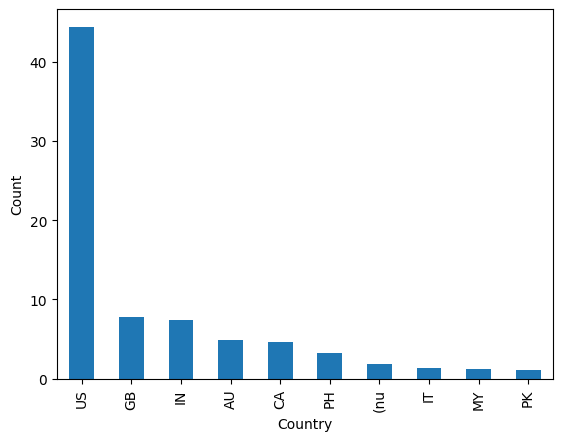

In [775]:
country_percent = df['country'].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(10)
country_percent.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [776]:
df['age'].value_counts()

age
18      1523
17      1370
19      1259
20      1231
21      1216
        ... 
266        1
191        1
78         1
1964       1
118        1
Name: count, Length: 104, dtype: int64

In [777]:
df['age'].value_counts(normalize=True) * 100

age
18      7.723515
17      6.947614
19      6.384705
20      6.242710
21      6.166641
          ...   
266     0.005071
191     0.005071
78      0.005071
1964    0.005071
118     0.005071
Name: proportion, Length: 104, dtype: float64

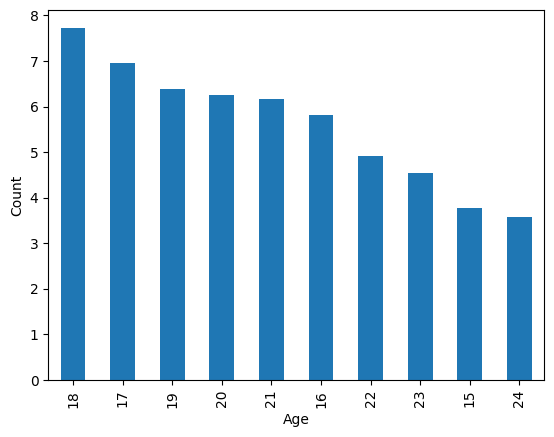

In [778]:
age_percent = df['age'].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(10)
age_percent.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [779]:
df['engnat'].value_counts()

engnat
1    12379
2     7270
0       70
Name: count, dtype: int64

In [780]:
df['engnat'].value_counts(normalize=True) * 100

engnat
1    62.777017
2    36.867995
0     0.354988
Name: proportion, dtype: float64

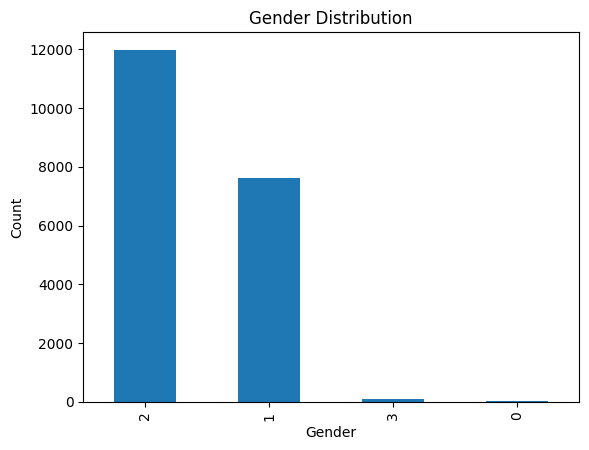

In [781]:
df['gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [782]:
df['gender'].value_counts()

gender
2    11985
1     7608
3      102
0       24
Name: count, dtype: int64

In [783]:
df['gender'].value_counts(normalize=True) * 100

gender
2    60.778944
1    38.582078
3     0.517268
0     0.121710
Name: proportion, dtype: float64

In [784]:
df['hand'].value_counts()

hand
1    17424
2     1724
3      471
0      100
Name: count, dtype: int64

In [785]:
df['hand'].value_counts(normalize=True) * 100

hand
1    88.361479
2     8.742837
3     2.388559
0     0.507125
Name: proportion, dtype: float64

### DataFrame - df_career

In [786]:
df_career.shape

(105, 11)

In [787]:
df_career.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   O_score              105 non-null    float64
 1   C_score              105 non-null    float64
 2   E_score              105 non-null    float64
 3   A_score              105 non-null    float64
 4   N_score              105 non-null    float64
 5   Numerical Aptitude   105 non-null    float64
 6   Spatial Aptitude     105 non-null    float64
 7   Perceptual Aptitude  105 non-null    float64
 8   Abstract Reasoning   105 non-null    float64
 9   Verbal Reasoning     105 non-null    float64
 10  Career               105 non-null    object 
dtypes: float64(10), object(1)
memory usage: 9.2+ KB


In [788]:
df_career.isnull().sum()

O_score                0
C_score                0
E_score                0
A_score                0
N_score                0
Numerical Aptitude     0
Spatial Aptitude       0
Perceptual Aptitude    0
Abstract Reasoning     0
Verbal Reasoning       0
Career                 0
dtype: int64

In [789]:
df_career.describe()

,O_score,C_score,E_score,A_score,N_score,Numerical Aptitude,Spatial Aptitude,Perceptual Aptitude,Abstract Reasoning,Verbal Reasoning
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,7.294857,7.538286,5.548952,6.863714,5.466381,5.939619,4.376476,5.163810,5.724190,6.794381
std,1.398485,1.215005,1.643137,1.515778,0.868926,1.958362,1.948409,1.747213,1.872927,1.495273
min,2.670000,3.560000,2.890000,3.230000,2.890000,2.890000,2.340000,3.010000,3.010000,3.450000
25%,6.670000,7.340000,4.230000,5.450000,4.670000,4.450000,3.120000,3.670000,4.340000,5.450000
50%,7.230000,7.670000,5.230000,6.450000,5.450000,5.120000,3.450000,4.450000,4.670000,7.450000
75%,8.670000,8.340000,7.010000,8.120000,6.010000,7.780000,4.450000,6.780000,7.670000,8.120000
max,9.450000,9.450000,9.340000,9.340000,8.120000,9.450000,9.230000,9.340000,9.340000,9.340000


In [790]:
df_career['Career'].value_counts()

Career
Environmental Scientist                  2
Accountant                               1
Salesperson                              1
Graphic Designer                         1
Teacher                                  1
                                        ..
Foreign Service Officer                  1
Customs and Border Protection Officer    1
Civil Engineer                           1
Robotics Engineer                        1
Electronics Design Engineer              1
Name: count, Length: 104, dtype: int64

## Data Cleaning

### DataFrame - df

In [791]:
df = df.drop(index=19064)

In [792]:
# Replace '(nu' with NaN in the specific column (e.g., 'country')
df['country'] = df['country'].replace('(nu', np.nan)

In [793]:
# Step 1: Get country proportions (probabilities)
country_probs = df['country'].value_counts(normalize=True)

# Step 2: Find indices of missing values
missing_indices = df[df['country'].isnull()].index

# Step 3: Randomly assign countries to missing values based on probabilities
np.random.seed(42)  # For reproducibility
imputed_values = np.random.choice(country_probs.index, size=len(missing_indices), p=country_probs.values)

# Step 4: Fill the missing values
df.loc[missing_indices, 'country'] = imputed_values

# Check results
print(df['country'].isnull().sum())  # Should be 0

0


In [794]:
df['country'].value_counts()

country
US    8926
GB    1561
IN    1489
AU    1001
CA     942
      ... 
CV       1
MR       1
UZ       1
TC       1
KG       1
Name: count, Length: 157, dtype: int64

In [795]:
df['e_score'] = df[e_columns].sum(axis=1)
df['n_score'] = df[n_columns].sum(axis=1)
df['a_score'] = df[a_columns].sum(axis=1)
df['c_score'] = df[c_columns].sum(axis=1)
df['o_score'] = df[o_columns].sum(axis=1)

In [796]:
df['e_score_percent'] = df['e_score'] * 100 / 50
df['n_score_percent'] = df['n_score'] * 100 / 50
df['a_score_percent'] = df['a_score'] * 100 / 50
df['c_score_percent'] = df['c_score'] * 100 / 50
df['o_score_percent'] = df['o_score'] * 100 / 50


In [797]:

# List of Big 5 columns
big5_columns = ['e_score', 'n_score', 'a_score', 'c_score', 'o_score']

# Function to compute percentile rank for a given series
def compute_percentiles(series):
    return series.apply(lambda x: percentileofscore(series, x))

# Apply to each Big 5 column
for col in big5_columns:
    df[f'{col}_percentile'] = compute_percentiles(df[col])


In [798]:
df['e_score_percentile'] = df['e_score_percentile'].round(1)
df['n_score_percentile'] = df['n_score_percentile'].round(1)
df['a_score_percentile'] = df['a_score_percentile'].round(1)
df['c_score_percentile'] = df['c_score_percentile'].round(1)
df['o_score_percentile'] = df['o_score_percentile'].round(1)

In [799]:
df['e_score'].describe()

count    19718.000000
mean        30.767218
std          3.515660
min         10.000000
25%         29.000000
50%         31.000000
75%         33.000000
max         50.000000
Name: e_score, dtype: float64

In [800]:
df.rename(columns={'e_score': 'E_score'}, inplace=True)
df.rename(columns={'n_score': 'N_score'}, inplace=True)
df.rename(columns={'a_score': 'A_score'}, inplace=True)
df.rename(columns={'c_score': 'C_score'}, inplace=True)
df.rename(columns={'o_score': 'O_score'}, inplace=True)

In [801]:
# Get min and max from df
old_min, old_max = 10, 50  # Given explicitly

# Get min and max from df_career
new_min = df_career['E_score'].min()
new_max = df_career['E_score'].max()

# Rescaling function
def rescale(x):
    return ((x - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Apply the function to df['E_score'] and create the new column
df['E_score_adjusted'] = df['E_score'].apply(rescale).round(2)


In [802]:
# Get min and max from df
old_min, old_max = 10, 50  # Given explicitly

# Get min and max from df_career
new_min = df_career['N_score'].min()
new_max = df_career['N_score'].max()

# Rescaling function
def rescale(x):
    return ((x - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Apply the function to df['N_score'] and create the new column
df['N_score_adjusted'] = df['N_score'].apply(rescale).round(2)

In [803]:
# Get min and max from df
old_min, old_max = 10, 50  # Given explicitly

# Get min and max from df_career
new_min = df_career['A_score'].min()
new_max = df_career['A_score'].max()

# Rescaling function
def rescale(x):
    return ((x - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Apply the function to df['A_score'] and create the new column
df['A_score_adjusted'] = df['A_score'].apply(rescale).round(2)

In [804]:
# Get min and max from df
old_min, old_max = 10, 50  # Given explicitly

# Get min and max from df_career
new_min = df_career['C_score'].min()
new_max = df_career['C_score'].max()

# Rescaling function
def rescale(x):
    return ((x - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Apply the function to df['C_score'] and create the new column
df['C_score_adjusted'] = df['C_score'].apply(rescale).round(2)

In [805]:
# Get min and max from df
old_min, old_max = 10, 50  # Given explicitly

# Get min and max from df_career
new_min = df_career['O_score'].min()
new_max = df_career['O_score'].max()

# Rescaling function
def rescale(x):
    return ((x - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Apply the function to df['A_score'] and create the new column
df['O_score_adjusted'] = df['O_score'].apply(rescale).round(2)

### DataFrame - df_career

In [806]:
df_career = df_career.drop(columns=['Numerical Aptitude', 'Spatial Aptitude', 'Perceptual Aptitude', 'Abstract Reasoning', 'Verbal Reasoning'])


In [807]:
engineer_jobs = [
    'Construction Engineer',
    'Biomedical Engineer',
    'Industrial Engineer',
    'Mechanical Engineer',
    'Aerospace Engineer',
    'Environmental Engineer',
    'Electrical Engineer',
    'Civil Engineer',
    'Robotics Engineer',
    'Electronics Design Engineer',
    'Mechanical Designer',
    'Technical Writer'
]

# Replace engineer jobs with 'Engineer'
df_career['Career'] = df_career['Career'].apply(lambda x: 'Engineer' if x in engineer_jobs else x)


In [808]:

teacher_jobs = [
    'Teacher',
    'Elementary School Teacher',
    'Sports Coach'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Teacher' if x in teacher_jobs else x)


In [809]:
analyst_jobs = [
    'Financial Analyst',
    'Data Analyst',
    'Market Research Analyst',
    'Marketing Analyst',
    'Database Analyst',
    'Market Researcher'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Data Analyst' if x in analyst_jobs else x)

In [810]:
manager_jobs = [
    'Marketing Manager',
    'Human Resources Manager',
    'IT Project Manager',
    'Product Manager',
    'Event Planner',
    'Marketing Coordinator',
    'HR Recruiter',
    'Social Media Manager',
    'Air Traffic Controller',
    'Administrative Officer',
    'Advertising Executive'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Manager' if x in manager_jobs else x)


In [811]:
scientist_jobs = [
    'Research Scientist',
    'Biologist',
    'Environmental Scientist',
    'Biomedical Researcher',
    'Biotechnologist',
    'Zoologist',
    'Wildlife Biologist',
    'Genetic Counselor',
    'Marine Biologist',
    'Geologist',
    'Astronomer',
    'Forensic Scientist',
    'Wildlife Conservationist',
    'Forestry Technician'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Scientist' if x in scientist_jobs else x)


In [812]:
finance_jobs = [
    'Financial Analyst',
    'Financial Planner',
    'Investment Banker',
    'Financial Advisor',
    'Insurance Underwriter',
    'Financial Auditor',
    'Accountant',
    'Tax Accountant',
    'Tax Collector',
    'Quality Control Inspector'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Finance & Accounting' if x in finance_jobs else x)


In [813]:
healthcare_jobs = [
    'Nurse',
    'Physician',
    'Pharmacist',
    'Pediatric Nurse',
    'Dental Hygienist',
    'Physical Therapist',
    'Speech Therapist',
    'Occupational Therapist',
    'Pediatrician',
    'Chiropractor',
    'Radiologic Technologist',
    'Rehabilitation Counselor',
    'Speech Pathologist',
    'Public Health Analyst',
    'Marriage Counselor',
    ]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Healthcare' if x in healthcare_jobs else x)

In [814]:

social_services_jobs = [
    'Psychologist',
    'Social Worker',
    'Forensic Psychologist'
    
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Social Services' if x in social_services_jobs else x)


In [815]:
it_specialist_jobs = [
    'Software Developer',
    'IT Support Specialist',
    'Software Quality Assurance Tester',
    'Web Developer',
    'Game Developer',
    'Database Administrator',
    'Video Game Tester',
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'IT Specialist' if x in it_specialist_jobs else x)


In [816]:
creative_jobs = [
    'Graphic Designer',
    'Artist',
    'Fashion Designer',
    'Fashion Stylist',
    'Event Photographer',
    'Marketing Copywriter',
    'Film Director',
    'Journalist',
    'Musician'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Creative' if x in creative_jobs else x)


In [817]:
sales_jobs = [
    'Salesperson',
    'Real Estate Agent',
    'Public Relations Specialist'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Sales & PR' if x in sales_jobs else x)


In [818]:
law_public_service_jobs = [
    'Lawyer',
    'Police Detective',
    'Police Officer',
    'Diplomat',
    'Customs and Border Protection Officer',
    'Foreign Service Officer',
    'Tax Collector',
    'Human Rights Lawyer'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Law & Public Service' if x in law_public_service_jobs else x)


In [819]:
planner_architect_jobs = [
    'Urban Planner',
    'Architect',
    'Graphic Designer',
    'Interior Designer'
]

df_career['Career'] = df_career['Career'].apply(lambda x: 'Architect & Designer' if x in planner_architect_jobs else x)


In [820]:
df_career['Career'].nunique()

15

In [821]:
df_career = df_career.sort_values(by='Career').reset_index(drop=True)

In [822]:
df_career = df_career.drop(index=0).reset_index(drop=True)
df_career = df_career.drop(index=3).reset_index(drop=True)


In [823]:
df_career['Career'].value_counts()

Career
Healthcare              15
Scientist               15
Engineer                12
Manager                 11
Finance & Accounting     9
Creative                 9
IT Specialist            7
Law & Public Service     7
Data Analyst             6
Architect & Designer     3
Sales & PR               3
Social Services          3
Teacher                  3
Name: count, dtype: int64

## Machine Learning

### Career

In [824]:
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,e_score_percentile,n_score_percentile,a_score_percentile,c_score_percentile,o_score_percentile,E_score_adjusted,N_score_adjusted,A_score_adjusted,C_score_adjusted,O_score_adjusted
0,3,53,1,1,1,1,US,4,2,5,...,66.0,3.6,48.9,44.3,27.7,6.44,4.07,6.59,6.65,6.23
1,13,46,1,2,1,1,US,2,2,3,...,19.8,39.5,37.2,16.8,3.7,5.79,5.37,6.44,6.21,5.38
2,1,14,2,2,1,1,PK,5,1,1,...,29.3,99.3,95.3,65.9,98.3,5.95,7.60,7.51,6.95,7.92
3,3,19,2,2,1,1,RO,2,5,2,...,93.3,97.0,92.2,75.3,84.6,7.08,7.20,7.35,7.09,7.25
4,11,25,2,2,1,2,US,3,1,3,...,7.7,55.4,98.4,6.9,0.5,5.47,5.77,7.81,5.92,4.70


In [825]:
df_career.head()

,O_score,C_score,E_score,A_score,N_score,Career
0,6.78,7.34,3.67,5.23,4.67,Architect & Designer
1,8.45,7.01,5.34,5.45,4.56,Architect & Designer
2,8.45,4.23,7.67,7.23,6.45,Architect & Designer
3,8.78,5.67,4.56,6.45,4.23,Creative
4,8.67,4.23,7.67,7.45,6.45,Creative


In [826]:
df_untrained_models = df.copy()

#### Random Forest

In [827]:
#Random Forest
# Features and target
X = df_career[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]
y = df_career['Career']

# Encode the Career labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the model (Random Forest here)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



Random Forest Accuracy: 0.6666666666666666
                      precision    recall  f1-score   support

Architect & Designer       0.00      0.00      0.00         1
            Creative       0.50      0.50      0.50         2
        Data Analyst       0.00      0.00      0.00         1
            Engineer       0.67      1.00      0.80         2
Finance & Accounting       1.00      0.67      0.80         3
          Healthcare       1.00      0.75      0.86         4
       IT Specialist       0.00      0.00      0.00         0
Law & Public Service       0.50      1.00      0.67         2
             Manager       0.33      1.00      0.50         1
          Sales & PR       0.00      0.00      0.00         1
           Scientist       1.00      1.00      1.00         2
     Social Services       0.00      0.00      0.00         1
             Teacher       1.00      1.00      1.00         1

            accuracy                           0.67        21
           macro avg     

c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [828]:
# Prepare features and target for prediction
feature_cols = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score']
X_untrained = df_untrained_models[feature_cols]

# Use the RandomForest model and label_encoder already trained on df_career
rf_preds = model.predict(X_untrained)
df_untrained_models['RandomForest_career'] = label_encoder.inverse_transform(rf_preds)

In [829]:
category_percentages = df_untrained_models['RandomForest_career'].value_counts(normalize=True) * 100
print(category_percentages)

RandomForest_career
Manager    100.0
Name: proportion, dtype: float64


#### KNN

In [830]:
# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
# Classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))



KNN Accuracy: 0.5714285714285714
KNN Classification Report:
                      precision    recall  f1-score   support

Architect & Designer       0.00      0.00      0.00         1
            Creative       0.00      0.00      0.00         2
        Data Analyst       0.00      0.00      0.00         1
            Engineer       0.67      1.00      0.80         2
Finance & Accounting       1.00      0.33      0.50         3
          Healthcare       0.75      0.75      0.75         4
       IT Specialist       0.00      0.00      0.00         0
Law & Public Service       0.50      1.00      0.67         2
             Manager       0.33      1.00      0.50         1
          Sales & PR       0.00      0.00      0.00         1
           Scientist       1.00      1.00      1.00         2
     Social Services       0.00      0.00      0.00         1
             Teacher       1.00      1.00      1.00         1

            accuracy                           0.57        21
        

c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

Optimal number of neighbors: 1


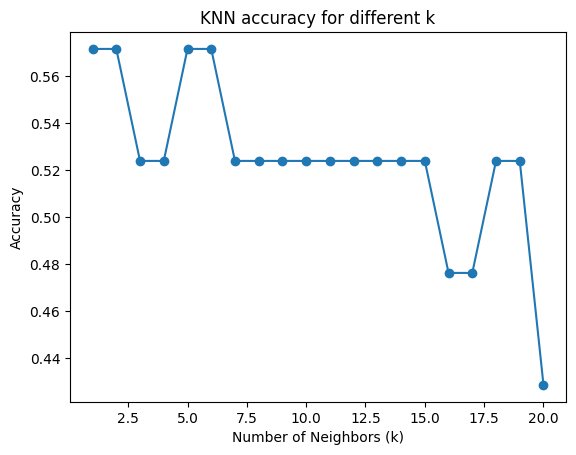

In [831]:
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)

optimal_k = k_range[accuracies.index(max(accuracies))]
print("Optimal number of neighbors:", optimal_k)
plt.plot(k_range, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN accuracy for different k')
plt.show()

In [832]:
# Prepare features for KNN prediction
feature_cols = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score']
X_untrained = df_untrained_models[feature_cols]

# Use the optimal_k found previously, or default to k=1 if not defined
k = optimal_k if 'optimal_k' in locals() else 1

# Train KNN on df_career (same as before)
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Predict careers for df_untrained_models
knn_preds = knn_model.predict(X_untrained)
df_untrained_models['KNN_careers'] = label_encoder.inverse_transform(knn_preds)

In [833]:
category_percentages = df_untrained_models['KNN_careers'].value_counts(normalize=True) * 100
print(category_percentages)

KNN_careers
Teacher                 96.713663
Manager                  1.719241
Law & Public Service     0.694797
Data Analyst             0.415864
Creative                 0.253575
Healthcare               0.172431
Finance & Accounting     0.030429
Name: proportion, dtype: float64


#### Single-Feature Models

In [834]:
# Ensemble of Single-Feature Models
# Define feature names
feature_list = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score']

# Split data
X = df_career[feature_list]
y = df_career['Career']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store models and their predictions
models = {}
probas = []

for feature in feature_list:
    # Train a model on this single feature
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train[[feature]], y_train)
    models[feature] = clf

    # Get predicted probabilities for the test set
    proba = clf.predict_proba(X_test[[feature]])
    probas.append(proba)

# Combine probabilities by averaging (equal weights)
combined_proba = np.mean(probas, axis=0)

# Get final predictions
final_preds = np.argmax(combined_proba, axis=1)

# Map back to class names
class_names = models[feature_list[0]].classes_
final_preds_labels = [class_names[i] for i in final_preds]

# Evaluate
print("Ensemble of Single-Feature Models Accuracy:", accuracy_score(y_test, final_preds_labels))
print("\nClassification Report:\n", classification_report(y_test, final_preds_labels))


Ensemble of Single-Feature Models Accuracy: 0.5238095238095238

Classification Report:
                       precision    recall  f1-score   support

Architect & Designer       0.00      0.00      0.00         1
            Creative       0.67      1.00      0.80         2
        Data Analyst       0.00      0.00      0.00         1
            Engineer       1.00      0.50      0.67         2
Finance & Accounting       0.33      0.33      0.33         3
          Healthcare       1.00      0.75      0.86         4
       IT Specialist       0.00      0.00      0.00         0
Law & Public Service       1.00      1.00      1.00         2
             Manager       0.33      1.00      0.50         1
          Sales & PR       0.00      0.00      0.00         1
           Scientist       0.25      0.50      0.33         2
     Social Services       0.00      0.00      0.00         1
             Teacher       0.00      0.00      0.00         1

            accuracy                      

c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [835]:
# Use the same feature_list and models from the previous Single-Feature Model cell
feature_list = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score']

# Prepare features for prediction
X_untrained = df_untrained_models[feature_list]

# Get predicted probabilities from each single-feature model
probas_untrained = []
for feature in feature_list:
    proba = models[feature].predict_proba(X_untrained[[feature]])
    probas_untrained.append(proba)

# Combine probabilities by averaging
combined_proba_untrained = np.mean(probas_untrained, axis=0)

# Get final predictions
final_preds_untrained = np.argmax(combined_proba_untrained, axis=1)

# Map back to class names
class_names = models[feature_list[0]].classes_
df_untrained_models['Single-Feature_career'] = [class_names[i] for i in final_preds_untrained]

In [836]:

category_percentages = df_untrained_models['Single-Feature_career'].value_counts(normalize=True) * 100
print(category_percentages)

Single-Feature_career
Healthcare    100.0
Name: proportion, dtype: float64


#### SVM

In [837]:
# SVM model for predicting 'Career' on df_career

# Features and target
X = df_career[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]
y = df_career['Career']

# Encode the Career labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.6666666666666666


In [838]:
# Prepare features for SVM prediction
feature_cols = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score']
X_untrained = df_untrained_models[feature_cols]

# Predict careers using the trained SVM model and label_encoder
svm_preds = svm_model.predict(X_untrained)
df_untrained_models['SVM_career'] = label_encoder.inverse_transform(svm_preds)

In [839]:
category_percentages = df_untrained_models['SVM_career'].value_counts(normalize=True) * 100
print(category_percentages)

SVM_career
Law & Public Service    84.785475
Healthcare              15.199310
Creative                 0.005072
Sales & PR               0.005072
Teacher                  0.005072
Name: proportion, dtype: float64


In [840]:
# Drop old columns
df = df.drop(columns=['E_score', 'N_score', 'C_score', 'A_score', 'O_score'])

# Rename adjusted columns to original names
df = df.rename(columns={
    'E_score_adjusted': 'E_score',
    'N_score_adjusted': 'N_score',
    'C_score_adjusted': 'C_score',
    'A_score_adjusted': 'A_score',
    'O_score_adjusted': 'O_score'
})


### Seperate Each Category 


#### Healthcare Model


In [841]:
category_name_healthcare = "Healthcare"
indices_healthcare = (y == category_name_healthcare)
X_cat_healthcare = X[indices_healthcare]
y_cat_healthcare = y[indices_healthcare]

# Sample 'Other' class (everything else)
other_indices_healthcare = (y != category_name_healthcare)
X_other_healthcare = X[other_indices_healthcare]
y_other_healthcare = np.array(['Other'] * len(X_other_healthcare))

# Combine
X_binary_healthcare = np.vstack((X_cat_healthcare, X_other_healthcare))
y_binary_healthcare = np.hstack((y_cat_healthcare, y_other_healthcare))

# Encode
le_binary_healthcare = LabelEncoder()
y_binary_encoded_healthcare = le_binary_healthcare.fit_transform(y_binary_healthcare)

# Apply SMOTE directly (target 30 samples for class 0 = Healthcare)
sampling_strategy_smote_healthcare = {0: 100}
smote_healthcare = SMOTE(sampling_strategy=sampling_strategy_smote_healthcare, random_state=42, k_neighbors=3)
X_smote_healthcare, y_smote_healthcare = smote_healthcare.fit_resample(X_binary_healthcare, y_binary_encoded_healthcare)

# Identify synthetic samples
synthetic_mask_healthcare = np.arange(len(y_smote_healthcare)) >= len(X_binary_healthcare)
X_synthetic_healthcare = X_smote_healthcare[synthetic_mask_healthcare]

# Optional: Add small noise to synthetic samples
X_smote_healthcare[synthetic_mask_healthcare] += np.random.normal(0, 0.1, X_synthetic_healthcare.shape)

# Optional: Modify feature 0 within min/max bounds (replace with real bounds)
feature_mins_healthcare = np.array([5.12, 6.01, 4.34, 5.45, 4.34])  # Update as needed
feature_maxs_healthcare = np.array([8.78, 8.89, 8.78, 8.45, 6.45])  # Update as needed

X_smote_healthcare[synthetic_mask_healthcare, 0] = np.random.uniform(
    feature_mins_healthcare[0], feature_maxs_healthcare[0], size=X_smote_healthcare[synthetic_mask_healthcare, 0].shape
)

# Clip all features
for i in range(X_smote_healthcare.shape[1]):
    X_smote_healthcare[:, i] = np.clip(X_smote_healthcare[:, i], feature_mins_healthcare[i], feature_maxs_healthcare[i])

# Train/test split
X_train_healthcare, X_test_healthcare, y_train_healthcare, y_test_healthcare = train_test_split(
    X_smote_healthcare, y_smote_healthcare, stratify=y_smote_healthcare, random_state=42
)

clf_healthcare = RandomForestClassifier(random_state=42)
clf_healthcare.fit(X_train_healthcare, y_train_healthcare)

y_pred_healthcare = clf_healthcare.predict(X_test_healthcare)

print(f"\nClassification report for category '{category_name_healthcare}':")
print(classification_report(y_test_healthcare, y_pred_healthcare, target_names=le_binary_healthcare.classes_))

accuracy_healthcare = clf_healthcare.score(X_test_healthcare, y_test_healthcare)
print(f"Test accuracy: {accuracy_healthcare:.2f}")
print(f"Original samples: {len(X_cat_healthcare)}")
print(f"Samples after SMOTE: {len(y_smote_healthcare)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_healthcare) - len(X_binary_healthcare)}")



Classification report for category 'Healthcare':
              precision    recall  f1-score   support

  Healthcare       0.90      0.76      0.83        25
       Other       0.77      0.91      0.83        22

    accuracy                           0.83        47
   macro avg       0.84      0.83      0.83        47
weighted avg       0.84      0.83      0.83        47

Test accuracy: 0.83
Original samples: 15
Samples after SMOTE: 188
Synthetic samples created by SMOTE: 85


In [842]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_healthcare = len(X_binary_healthcare)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_healthcare = np.arange(len(y_smote_healthcare)) >= n_original_healthcare

# Get synthetic samples and labels
X_synthetic_healthcare = X_smote_healthcare[synthetic_mask_healthcare]
y_synthetic_healthcare = y_smote_healthcare[synthetic_mask_healthcare]

# Filter synthetic samples for 'Healthcare' only (label 0)
healthcare_label = 0  # assuming 0 = Healthcare after encoding
healthcare_synthetic = X_synthetic_healthcare[y_synthetic_healthcare == healthcare_label]

print(f"Number of synthetic 'Healthcare' samples: {len(healthcare_synthetic)}")
print(healthcare_synthetic)


Number of synthetic 'Healthcare' samples: 85
[[6.67628143 7.96961675 7.72120321 8.45       5.42988088]
 [5.20223767 6.53128621 7.84296288 8.45       5.9539819 ]
 [6.10335914 6.01       8.78       6.66797867 6.45      ]
 [7.10238123 6.06470974 7.31978073 8.45       6.45      ]
 [7.43853028 6.09135096 8.03809081 8.45       6.45      ]
 [6.06386893 6.04241664 7.41442059 8.45       6.45      ]
 [5.63004323 8.32001679 7.57000569 8.44288839 5.35011834]
 [8.17584467 6.07241198 7.40283455 8.45       6.45      ]
 [8.72291198 6.38228383 8.07391755 8.45       5.92745028]
 [7.04402607 6.49129315 7.72362754 8.45       6.03436872]
 [5.74834619 6.39930568 7.73289617 8.45       5.86519157]
 [6.11664482 6.37815558 8.37904537 8.45       6.15753562]
 [5.18730988 6.43400615 7.70752961 8.45       6.00814869]
 [8.46633363 6.48227186 7.69727691 8.45       6.16327389]
 [5.55096896 6.49017117 7.9407351  8.45       6.03240925]
 [7.2300503  6.14407923 8.24891674 8.45       6.45      ]
 [6.12304211 6.54592708 8.4

#### Architect/Designer Model

In [843]:
category_name_arch = "Architect & Designer"
indices_arch = (y == category_name_arch)
X_cat_arch = X[indices_arch]
y_cat_arch = y[indices_arch]

# Sample 'Other' class (everything else)
other_indices_arch = (y != category_name_arch)
X_other_arch = X[other_indices_arch]
y_other_arch = np.array(['Other'] * len(X_other_arch))

# Combine category + Other
X_binary_arch = np.vstack((X_cat_arch, X_other_arch))
y_binary_arch = np.hstack((y_cat_arch, y_other_arch))

# Encode binary labels
le_binary_arch = LabelEncoder()
y_binary_encoded_arch = le_binary_arch.fit_transform(y_binary_arch)

# Oversample to 6 samples using RandomOverSampler
sampling_strategy_ros_arch = {0: 6}
ros_arch = RandomOverSampler(sampling_strategy=sampling_strategy_ros_arch, random_state=42)
X_ros_arch, y_ros_arch = ros_arch.fit_resample(X_binary_arch, y_binary_encoded_arch)

# Add small random noise ±0.01 to newly duplicated samples by ROS
new_ros_samples_idx = np.arange(len(X_binary_arch), len(X_ros_arch))
noise_ros = np.random.uniform(low=-0.01, high=0.01, size=X_ros_arch[new_ros_samples_idx].shape)
X_ros_arch[new_ros_samples_idx] += noise_ros

# SMOTE to generate 30 samples for Architect/Designer (no scaling)
sampling_strategy_smote_arch = {0: 103} 
smote_arch = SMOTE(sampling_strategy=sampling_strategy_smote_arch, random_state=42, k_neighbors=3)
X_smote_arch, y_smote_arch = smote_arch.fit_resample(X_ros_arch, y_ros_arch)

# Add small random noise to synthetic samples for Architect/Designer
synthetic_mask_arch = np.arange(len(y_smote_arch)) >= len(y_ros_arch)
noise_arch = np.random.normal(0, 0.1, X_smote_arch[synthetic_mask_arch].shape)
X_smote_arch[synthetic_mask_arch] += noise_arch

# For feature 0 of synthetic samples, generate random values within min/max bounds
feature_mins_arch = np.array([6.78, 4.23, 3.67, 5.23, 4.56])  # update as needed
feature_maxs_arch = np.array([8.45, 7.34, 7.67, 7.23, 6.45])  # update as needed

X_smote_arch[synthetic_mask_arch, 0] = np.random.uniform(
    feature_mins_arch[0], feature_maxs_arch[0], size=X_smote_arch[synthetic_mask_arch, 0].shape
)

# Clip all features to Architect/Designer-specific bounds
for i in range(X_smote_arch.shape[1]):
    X_smote_arch[:, i] = np.clip(X_smote_arch[:, i], feature_mins_arch[i], feature_maxs_arch[i])

# Train/test split
X_train_arch, X_test_arch, y_train_arch, y_test_arch = train_test_split(
    X_smote_arch, y_smote_arch, stratify=y_smote_arch, random_state=42
)

clf_arch = RandomForestClassifier(random_state=42)
clf_arch.fit(X_train_arch, y_train_arch)

y_pred_arch = clf_arch.predict(X_test_arch)

print(f"\nClassification report for category '{category_name_arch}':")
print(classification_report(y_test_arch, y_pred_arch, target_names=le_binary_arch.classes_))

accuracy_arch = clf_arch.score(X_test_arch, y_test_arch)
print(f"Test accuracy: {accuracy_arch:.2f}")
print(f"Original samples after ROS: {len(y_ros_arch)}")
print(f"Samples after SMOTE: {len(y_smote_arch)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_arch) - len(y_ros_arch)}")



Classification report for category 'Architect & Designer':
                      precision    recall  f1-score   support

Architect & Designer       0.89      0.92      0.91        26
               Other       0.92      0.88      0.90        25

            accuracy                           0.90        51
           macro avg       0.90      0.90      0.90        51
        weighted avg       0.90      0.90      0.90        51

Test accuracy: 0.90
Original samples after ROS: 106
Samples after SMOTE: 203
Synthetic samples created by SMOTE: 97


In [844]:
# Store original length BEFORE resampling
n_original_arch = len(X_binary_arch)

# Perform RandomOverSampler once
ros_arch = RandomOverSampler(sampling_strategy={0: 6}, random_state=42)
X_ros_arch, y_ros_arch = ros_arch.fit_resample(X_binary_arch, y_binary_encoded_arch)

# Identify indices of newly duplicated samples (those beyond the original length)
new_sample_indices_arch = np.arange(n_original_arch, len(X_ros_arch))

# Extract duplicated samples and their labels
duplicated_samples_architect = X_ros_arch[new_sample_indices_arch]
duplicated_labels_architect = y_ros_arch[new_sample_indices_arch]

print("Newly duplicated samples (from ROS):")
print(duplicated_samples_architect)



Newly duplicated samples (from ROS):
[[7.67 6.45 4.23 7.23 8.45]
 [3.67 4.67 7.34 5.23 6.78]
 [7.67 6.45 4.23 7.23 8.45]]


In [845]:
# Identify which samples are synthetic (newly generated)
synthetic_mask_arch = np.arange(len(y_smote_arch)) >= len(y_ros_arch)

# Get the synthetic samples and labels
X_synthetic_arch = X_smote_arch[synthetic_mask_arch]
y_synthetic_arch = y_smote_arch[synthetic_mask_arch]

# Since label 1 corresponds to "Architect", filter synthetic samples for Architect only
arch_label = 0  # assuming 1 = Architect after encoding
arch_synthetic = X_synthetic_arch[y_synthetic_arch == arch_label]

print(f"Number of synthetic 'Architect' samples: {len(arch_synthetic)}")
print(arch_synthetic)


Number of synthetic 'Architect' samples: 97
[[6.99328152 6.44790898 4.29623617 7.23       6.45      ]
 [8.15953294 4.83809427 6.97321595 5.42521949 6.45      ]
 [8.08598691 6.47343066 4.18203117 7.23       6.45      ]
 [7.96360365 6.4017849  4.382118   7.23       6.45      ]
 [6.84038784 6.47892118 4.31668821 7.23       6.45      ]
 [7.28622435 6.59270179 4.45899891 7.20229414 6.45      ]
 [7.21939799 6.60708442 4.18064983 7.19666831 6.45      ]
 [7.3814278  4.53008124 7.07874828 5.25892937 6.45      ]
 [6.92636339 6.60266616 4.13433456 7.23       6.45      ]
 [8.34471956 4.78258626 7.14892224 5.31930498 6.45      ]
 [7.70484974 4.68704881 7.54992584 5.23       6.45      ]
 [7.2902256  6.32965056 4.26308124 7.23       6.45      ]
 [7.44295913 5.67603162 5.29412775 6.53324031 6.45      ]
 [7.52682824 4.48384643 7.39101305 5.47874608 6.45      ]
 [7.78299254 4.70291192 7.37019668 5.29654553 6.45      ]
 [7.64118464 4.65435425 6.61600441 5.54225959 6.45      ]
 [8.3153846  5.92289075 4.95

#### Creative Model

In [846]:
category_name_creative = "Creative"
indices_creative = (y == category_name_creative)
X_cat_creative = X[indices_creative]
y_cat_creative = y[indices_creative]

# Sample 'Other' class (everything else)
other_indices_creative = (y != category_name_creative)
X_other_creative = X[other_indices_creative]
y_other_creative = np.array(['Other'] * len(X_other_creative))

# Combine
X_binary_creative = np.vstack((X_cat_creative, X_other_creative))
y_binary_creative = np.hstack((y_cat_creative, y_other_creative))

# Encode
le_binary_creative = LabelEncoder()
y_binary_encoded_creative = le_binary_creative.fit_transform(y_binary_creative)

# Apply SMOTE directly (target 30 samples for class 0 = Creative)
sampling_strategy_smote_creative = {0: 100}
smote_creative = SMOTE(sampling_strategy=sampling_strategy_smote_creative, random_state=42, k_neighbors=5)
X_smote_creative, y_smote_creative = smote_creative.fit_resample(X_binary_creative, y_binary_encoded_creative)

# Identify synthetic samples
synthetic_mask_creative = np.arange(len(y_smote_creative)) >= len(X_binary_creative)
X_synthetic_creative = X_smote_creative[synthetic_mask_creative]

# Optional: Add small noise to synthetic samples
X_smote_creative[synthetic_mask_creative] += np.random.normal(0, 0.1, X_synthetic_creative.shape)

# Optional: Modify feature 0 within min/max bounds (update with real values!)
feature_mins_creative = np.array([5.12, 6.01, 4.34, 5.45, 4.34])  # Update as needed
feature_maxs_creative = np.array([8.78, 8.89, 8.78, 8.45, 6.45])  # Update as needed

X_smote_creative[synthetic_mask_creative, 0] = np.random.uniform(
    feature_mins_creative[0], feature_maxs_creative[0], size=X_smote_creative[synthetic_mask_creative, 0].shape
)

# Clip all features
for i in range(X_smote_creative.shape[1]):
    X_smote_creative[:, i] = np.clip(X_smote_creative[:, i], feature_mins_creative[i], feature_maxs_creative[i])

# Train/test split
X_train_creative, X_test_creative, y_train_creative, y_test_creative = train_test_split(
    X_smote_creative, y_smote_creative, stratify=y_smote_creative, random_state=42
)

clf_creative = RandomForestClassifier(random_state=42)
clf_creative.fit(X_train_creative, y_train_creative)

y_pred_creative = clf_creative.predict(X_test_creative)

print(f"\nClassification report for category '{category_name_creative}':")
print(classification_report(y_test_creative, y_pred_creative, target_names=le_binary_creative.classes_))

accuracy_creative = clf_creative.score(X_test_creative, y_test_creative)
print(f"Test accuracy: {accuracy_creative:.2f}")
print(f"Original samples: {len(X_cat_creative)}")
print(f"Samples after SMOTE: {len(y_smote_creative)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_creative) - len(X_binary_creative)}")



Classification report for category 'Creative':
              precision    recall  f1-score   support

    Creative       0.93      1.00      0.96        25
       Other       1.00      0.92      0.96        24

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49

Test accuracy: 0.96
Original samples: 9
Samples after SMOTE: 194
Synthetic samples created by SMOTE: 91


In [847]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_creative = len(X_binary_creative)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_creative = np.arange(len(y_smote_creative)) >= n_original_creative

# Get synthetic samples and labels
X_synthetic_creative = X_smote_creative[synthetic_mask_creative]
y_synthetic_creative = y_smote_creative[synthetic_mask_creative]

# Filter synthetic samples for 'Creative' only (label 0)
creative_label = 0  # assuming 0 = Creative after encoding
creative_synthetic = X_synthetic_creative[y_synthetic_creative == creative_label]

print(f"Number of synthetic 'Creative' samples: {len(creative_synthetic)}")
print(creative_synthetic)


Number of synthetic 'Creative' samples: 91
[[7.37846345 6.01       4.34       6.77848069 6.45      ]
 [5.53664852 6.01       4.34       7.03585475 6.45      ]
 [6.3835167  6.45734018 4.34       7.31285164 6.45      ]
 [6.9771277  6.01       7.27833164 6.36804008 6.45      ]
 [8.31965444 6.01       4.34       6.79155861 6.45      ]
 [6.92638048 6.63757131 4.38662634 7.29791414 6.45      ]
 [7.69026708 6.01       4.34       6.79683952 6.45      ]
 [8.75370963 6.87497475 4.46896399 6.55519032 6.45      ]
 [5.60125018 6.9923284  4.34       6.62134614 6.45      ]
 [6.12551738 6.51802654 4.34578148 7.40485903 6.45      ]
 [6.56414844 6.37921473 4.34       7.53795926 6.45      ]
 [6.66389113 6.01       4.34       6.76294209 6.45      ]
 [6.62433714 6.01       4.34       6.92721776 6.45      ]
 [8.44185627 6.07717983 4.34       6.58543    6.45      ]
 [7.73335948 6.99282054 4.34       6.34284449 6.45      ]
 [7.34493308 6.01       5.02859723 6.50424305 6.45      ]
 [6.25230415 6.88567087 4.34 

#### Data Analyst Model

In [848]:
category_name_analyst = "Data Analyst"
indices_analyst = (y == category_name_analyst)
X_cat_analyst = X[indices_analyst]
y_cat_analyst = y[indices_analyst]

# Sample 'Other' class (everything else)
other_indices_analyst = (y != category_name_analyst)
X_other_analyst = X[other_indices_analyst]
y_other_analyst = np.array(['Other'] * len(X_other_analyst))

# Combine
X_binary_analyst = np.vstack((X_cat_analyst, X_other_analyst))
y_binary_analyst = np.hstack((y_cat_analyst, y_other_analyst))

# Encode
le_binary_analyst = LabelEncoder()
y_binary_encoded_analyst = le_binary_analyst.fit_transform(y_binary_analyst)

# Apply SMOTE directly (target 30 samples for class 0 = Data Analyst)
sampling_strategy_smote_analyst = {0: 100}
smote_analyst = SMOTE(sampling_strategy=sampling_strategy_smote_analyst, random_state=42, k_neighbors=3)
X_smote_analyst, y_smote_analyst = smote_analyst.fit_resample(X_binary_analyst, y_binary_encoded_analyst)

# Identify synthetic samples
synthetic_mask_analyst = np.arange(len(y_smote_analyst)) >= len(X_binary_analyst)
X_synthetic_analyst = X_smote_analyst[synthetic_mask_analyst]

# Optional: Add small noise to synthetic samples
X_smote_analyst[synthetic_mask_analyst] += np.random.normal(0, 0.1, X_synthetic_analyst.shape)

# Optional: Modify feature 0 within min/max bounds (update with real values!)
feature_mins_analyst = np.array([5.12, 6.01, 4.34, 5.45, 4.34])  # Update as needed
feature_maxs_analyst = np.array([8.78, 8.89, 8.78, 8.45, 6.45])  # Update as needed

X_smote_analyst[synthetic_mask_analyst, 0] = np.random.uniform(
    feature_mins_analyst[0], feature_maxs_analyst[0], size=X_smote_analyst[synthetic_mask_analyst, 0].shape
)

# Clip all features
for i in range(X_smote_analyst.shape[1]):
    X_smote_analyst[:, i] = np.clip(X_smote_analyst[:, i], feature_mins_analyst[i], feature_maxs_analyst[i])

# Train/test split
X_train_analyst, X_test_analyst, y_train_analyst, y_test_analyst = train_test_split(
    X_smote_analyst, y_smote_analyst, stratify=y_smote_analyst, random_state=42
)

clf_analyst = RandomForestClassifier(random_state=42)
clf_analyst.fit(X_train_analyst, y_train_analyst)

y_pred_analyst = clf_analyst.predict(X_test_analyst)

print(f"\nClassification report for category '{category_name_analyst}':")
print(classification_report(y_test_analyst, y_pred_analyst, target_names=le_binary_analyst.classes_))

accuracy_analyst = clf_analyst.score(X_test_analyst, y_test_analyst)
print(f"Test accuracy: {accuracy_analyst:.2f}")
print(f"Original samples: {len(X_cat_analyst)}")
print(f"Samples after SMOTE: {len(y_smote_analyst)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_analyst) - len(X_binary_analyst)}")



Classification report for category 'Data Analyst':
              precision    recall  f1-score   support

Data Analyst       0.91      0.84      0.88        25
       Other       0.85      0.92      0.88        25

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50

Test accuracy: 0.88
Original samples: 6
Samples after SMOTE: 197
Synthetic samples created by SMOTE: 94


In [849]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_analyst = len(X_binary_analyst)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_analyst = np.arange(len(y_smote_analyst)) >= n_original_analyst

# Get synthetic samples and labels
X_synthetic_analyst = X_smote_analyst[synthetic_mask_analyst]
y_synthetic_analyst = y_smote_analyst[synthetic_mask_analyst]

# Filter synthetic samples for 'Data Analyst' only (label 0)
analyst_label = 0  # assuming 0 = Data Analyst after encoding
analyst_synthetic = X_synthetic_analyst[y_synthetic_analyst == analyst_label]

print(f"Number of synthetic 'Data Analyst' samples: {len(analyst_synthetic)}")
print(analyst_synthetic)


Number of synthetic 'Data Analyst' samples: 94
[[7.1429079  6.01       8.62973941 6.21395422 6.45      ]
 [6.57138648 6.01       8.60692396 6.61155828 6.45      ]
 [5.602077   6.01       8.01231243 6.56084911 6.45      ]
 [8.28698248 6.01       8.36887234 6.05276418 6.45      ]
 [5.69561994 6.01       8.62055222 6.41167372 6.45      ]
 [6.25382356 6.01       8.21508718 6.19418214 6.45      ]
 [6.18156665 6.01       8.11894022 6.25362187 6.45      ]
 [8.30937537 6.01       8.73941814 6.56929665 6.45      ]
 [7.58209296 6.01       8.23206765 5.95938914 6.45      ]
 [8.03585391 6.36235735 7.60916052 7.37880513 6.45      ]
 [6.03671251 6.01       8.00785984 6.1417896  6.45      ]
 [7.4070392  6.37526114 7.65793586 7.3887791  6.45      ]
 [7.2125903  6.01       8.42304894 6.47537397 6.45      ]
 [8.16815918 6.05635991 7.9015787  7.0325486  6.45      ]
 [8.43627864 6.51215719 7.64450497 7.47624403 6.45      ]
 [5.16449378 6.01       7.96806698 7.10082193 6.45      ]
 [7.5869129  6.01       8

#### Engineer Model

In [850]:
category_name_engineer = "Engineer"
indices_engineer = (y == category_name_engineer)
X_cat_engineer = X[indices_engineer]
y_cat_engineer = y[indices_engineer]

# Sample 'Other' class (everything else)
other_indices_engineer = (y != category_name_engineer)
X_other_engineer = X[other_indices_engineer]
y_other_engineer = np.array(['Other'] * len(X_other_engineer))

# Combine
X_binary_engineer = np.vstack((X_cat_engineer, X_other_engineer))
y_binary_engineer = np.hstack((y_cat_engineer, y_other_engineer))

# Encode
le_binary_engineer = LabelEncoder()
y_binary_encoded_engineer = le_binary_engineer.fit_transform(y_binary_engineer)

# Apply SMOTE directly (target 30 samples for class 0 = Engineer)
sampling_strategy_smote_engineer = {0: 100}
smote_engineer = SMOTE(sampling_strategy=sampling_strategy_smote_engineer, random_state=42, k_neighbors=3)
X_smote_engineer, y_smote_engineer = smote_engineer.fit_resample(X_binary_engineer, y_binary_encoded_engineer)

# Identify synthetic samples
synthetic_mask_engineer = np.arange(len(y_smote_engineer)) >= len(X_binary_engineer)
X_synthetic_engineer = X_smote_engineer[synthetic_mask_engineer]

# Optional: Add small noise to synthetic samples
X_smote_engineer[synthetic_mask_engineer] += np.random.normal(0, 0.1, X_synthetic_engineer.shape)

# Optional: Modify feature 0 within min/max bounds (update with real values!)
feature_mins_engineer = np.array([4.56, 6.78, 3.78, 3.23, 2.89])  # Update as needed
feature_maxs_engineer = np.array([8.67, 8.78, 5.67, 7.45, 6.01])  # Update as needed

X_smote_engineer[synthetic_mask_engineer, 0] = np.random.uniform(
    feature_mins_engineer[0], feature_maxs_engineer[0], size=X_smote_engineer[synthetic_mask_engineer, 0].shape
)

# Clip all features
for i in range(X_smote_engineer.shape[1]):
    X_smote_engineer[:, i] = np.clip(X_smote_engineer[:, i], feature_mins_engineer[i], feature_maxs_engineer[i])

# Train/test split
X_train_engineer, X_test_engineer, y_train_engineer, y_test_engineer = train_test_split(
    X_smote_engineer, y_smote_engineer, stratify=y_smote_engineer, random_state=42
)

clf_engineer = RandomForestClassifier(random_state=42)
clf_engineer.fit(X_train_engineer, y_train_engineer)

y_pred_engineer = clf_engineer.predict(X_test_engineer)

print(f"\nClassification report for category '{category_name_engineer}':")
print(classification_report(y_test_engineer, y_pred_engineer, target_names=le_binary_engineer.classes_))

accuracy_engineer = clf_engineer.score(X_test_engineer, y_test_engineer)
print(f"Test accuracy: {accuracy_engineer:.2f}")
print(f"Original samples: {len(X_cat_engineer)}")
print(f"Samples after SMOTE: {len(y_smote_engineer)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_engineer) - len(X_binary_engineer)}")



Classification report for category 'Engineer':
              precision    recall  f1-score   support

    Engineer       0.92      0.88      0.90        25
       Other       0.88      0.91      0.89        23

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48

Test accuracy: 0.90
Original samples: 12
Samples after SMOTE: 191
Synthetic samples created by SMOTE: 88


In [851]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_engineer = len(X_binary_engineer)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_engineer = np.arange(len(y_smote_engineer)) >= n_original_engineer

# Get synthetic samples and labels
X_synthetic_engineer = X_smote_engineer[synthetic_mask_engineer]
y_synthetic_engineer = y_smote_engineer[synthetic_mask_engineer]

# Filter synthetic samples for 'Engineer' only (label 0)
engineer_label = 0  # assuming 0 = Engineer after encoding
engineer_synthetic = X_synthetic_engineer[y_synthetic_engineer == engineer_label]

print(f"Number of synthetic 'Engineer' samples: {len(engineer_synthetic)}")
print(engineer_synthetic)


Number of synthetic 'Engineer' samples: 88
[[7.32506257 6.78       5.67       5.29688925 6.01      ]
 [5.46627252 6.78       5.67       5.39560205 6.01      ]
 [5.45683297 6.78       5.67       5.33411081 6.01      ]
 [8.15243499 6.78       5.67       5.06934229 6.01      ]
 [5.5861394  6.78       5.67       5.32620544 6.01      ]
 [5.64194659 6.78       5.67       4.95990465 6.01      ]
 [4.56268544 6.78       5.67       5.2184246  6.01      ]
 [8.13844973 6.78       5.67       5.228937   6.01      ]
 [7.81756468 6.78       5.67       5.40115952 6.01      ]
 [7.13832192 6.78       5.67       5.42284528 6.01      ]
 [7.64359229 6.78       5.67       5.4471429  6.01      ]
 [5.18491961 6.78       5.67       5.36051137 6.01      ]
 [6.44370997 6.78       5.67       5.14908595 6.01      ]
 [6.00351168 6.78       5.67       5.25803268 6.01      ]
 [4.94542152 6.78       5.67       5.1132447  6.01      ]
 [6.55799629 6.78       5.67       5.32765929 6.01      ]
 [8.34423996 6.78       5.67 

#### Finance & Accountant Model

In [852]:
category_name_finance = "Finance & Accounting"
indices_finance = (y == category_name_finance)
X_cat_finance = X[indices_finance]
y_cat_finance = y[indices_finance]

# Sample 'Other' class (everything else)
other_indices_finance = (y != category_name_finance)
X_other_finance = X[other_indices_finance]
y_other_finance = np.array(['Other'] * len(X_other_finance))

# Combine
X_binary_finance = np.vstack((X_cat_finance, X_other_finance))
y_binary_finance = np.hstack((y_cat_finance, y_other_finance))

# Encode
le_binary_finance = LabelEncoder()
y_binary_encoded_finance = le_binary_finance.fit_transform(y_binary_finance)

# Apply SMOTE directly (target 30 samples for class 0 = Finance & Accountant)
sampling_strategy_smote_finance = {0: 100}
smote_finance = SMOTE(sampling_strategy=sampling_strategy_smote_finance, random_state=42, k_neighbors=3)
X_smote_finance, y_smote_finance = smote_finance.fit_resample(X_binary_finance, y_binary_encoded_finance)

# Identify synthetic samples
synthetic_mask_finance = np.arange(len(y_smote_finance)) >= len(X_binary_finance)
X_synthetic_finance = X_smote_finance[synthetic_mask_finance]

# Optional: Add small noise to synthetic samples
X_smote_finance[synthetic_mask_finance] += np.random.normal(0, 0.1, X_synthetic_finance.shape)

# Optional: Modify feature 0 within min/max bounds (update with real values!)
feature_mins_finance = np.array([5.12, 6.01, 4.34, 5.45, 4.34])  # Update as needed
feature_maxs_finance = np.array([8.78, 8.89, 8.78, 8.45, 6.45])  # Update as needed

X_smote_finance[synthetic_mask_finance, 0] = np.random.uniform(
    feature_mins_finance[0], feature_maxs_finance[0], size=X_smote_finance[synthetic_mask_finance, 0].shape
)

# Clip all features
for i in range(X_smote_finance.shape[1]):
    X_smote_finance[:, i] = np.clip(X_smote_finance[:, i], feature_mins_finance[i], feature_maxs_finance[i])

# Train/test split
X_train_finance, X_test_finance, y_train_finance, y_test_finance = train_test_split(
    X_smote_finance, y_smote_finance, stratify=y_smote_finance, random_state=42
)

clf_finance = RandomForestClassifier(random_state=42)
clf_finance.fit(X_train_finance, y_train_finance)

y_pred_finance = clf_finance.predict(X_test_finance)

print(f"\nClassification report for category '{category_name_finance}':")
print(classification_report(y_test_finance, y_pred_finance, target_names=le_binary_finance.classes_))

accuracy_finance = clf_finance.score(X_test_finance, y_test_finance)
print(f"Test accuracy: {accuracy_finance:.2f}")
print(f"Original samples: {len(X_cat_finance)}")
print(f"Samples after SMOTE: {len(y_smote_finance)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_finance) - len(X_binary_finance)}")



Classification report for category 'Finance & Accounting':
                      precision    recall  f1-score   support

Finance & Accounting       0.88      0.92      0.90        25
               Other       0.91      0.88      0.89        24

            accuracy                           0.90        49
           macro avg       0.90      0.90      0.90        49
        weighted avg       0.90      0.90      0.90        49

Test accuracy: 0.90
Original samples: 9
Samples after SMOTE: 194
Synthetic samples created by SMOTE: 91


In [853]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_finance = len(X_binary_finance)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_finance = np.arange(len(y_smote_finance)) >= n_original_finance

# Get synthetic samples and labels
X_synthetic_finance = X_smote_finance[synthetic_mask_finance]
y_synthetic_finance = y_smote_finance[synthetic_mask_finance]

# Filter synthetic samples for 'Finance & Accountant' only (label 0)
finance_label = 0  # assuming 0 = Finance & Accountant after encoding
finance_synthetic = X_synthetic_finance[y_synthetic_finance == finance_label]

print(f"Number of synthetic 'Finance & Accounting' samples: {len(finance_synthetic)}")
print(finance_synthetic)


Number of synthetic 'Finance & Accounting' samples: 91
[[7.19101305 6.01       8.05857559 6.0358344  6.45      ]
 [8.44334788 6.01       8.78       6.29832546 5.80460255]
 [6.57050421 6.01       8.11725954 5.45       5.92560442]
 [6.20455243 6.01       8.70509045 6.25875874 6.45      ]
 [5.64509821 6.01       8.13654017 6.22261273 6.45      ]
 [5.67429061 6.01       8.60638746 5.45040352 5.43477998]
 [6.70394363 6.01       7.99313929 6.20222196 6.45      ]
 [7.30018816 6.01       8.16238569 6.31952541 6.45      ]
 [5.41505238 6.01       8.73087881 6.28728096 6.18776105]
 [8.55882104 6.32905682 8.78       7.34181279 6.45      ]
 [7.88378904 6.01       8.39751203 6.35069578 6.45      ]
 [7.26704354 6.01       8.78       6.10301412 6.45      ]
 [8.15208554 6.01       8.68509137 6.05321563 6.45      ]
 [5.41348353 6.01       8.50427232 5.48171673 5.4587456 ]
 [6.86523029 6.01       8.31645184 6.49860363 6.45      ]
 [7.42614084 6.01       7.7743362  6.1450094  6.45      ]
 [8.15286964 6.01

#### IT Specialist Model

In [854]:
category_name_law = "IT Specialist"
indices_law = (y == category_name_law)
X_cat_law = X[indices_law]
y_cat_law = y[indices_law]

# Sample 'Other' class (everything else)
other_indices_law = (y != category_name_law)
X_other_law = X[other_indices_law]
y_other_law = np.array(['Other'] * len(X_other_law))

# Combine
X_binary_law = np.vstack((X_cat_law, X_other_law))
y_binary_law = np.hstack((y_cat_law, y_other_law))

# Encode
le_binary_law = LabelEncoder()
y_binary_encoded_law = le_binary_law.fit_transform(y_binary_law)

# Apply SMOTE directly (target 30 samples for class 0 = IT Specialist)
sampling_strategy_smote_law = {0: 100}
smote_law = SMOTE(sampling_strategy=sampling_strategy_smote_law, random_state=42, k_neighbors=3)
X_smote_law, y_smote_law = smote_law.fit_resample(X_binary_law, y_binary_encoded_law)

# Identify synthetic samples
synthetic_mask_law = np.arange(len(y_smote_law)) >= len(X_binary_law)
X_synthetic_law = X_smote_law[synthetic_mask_law]

# Optional: Add small noise to synthetic samples
X_smote_law[synthetic_mask_law] += np.random.normal(0, 0.1, X_synthetic_law.shape)

# Optional: Modify feature 0 within min/max bounds (update with real values!)
feature_mins_law = np.array([5.12, 6.01, 4.34, 5.45, 4.34])  # Update as needed
feature_maxs_law = np.array([8.78, 8.89, 8.78, 8.45, 6.45])  # Update as needed

X_smote_law[synthetic_mask_law, 0] = np.random.uniform(
    feature_mins_law[0], feature_maxs_law[0], size=X_smote_law[synthetic_mask_law, 0].shape
)

# Clip all features
for i in range(X_smote_law.shape[1]):
    X_smote_law[:, i] = np.clip(X_smote_law[:, i], feature_mins_law[i], feature_maxs_law[i])

# Train/test split
X_train_law, X_test_law, y_train_law, y_test_law = train_test_split(
    X_smote_law, y_smote_law, stratify=y_smote_law, random_state=42
)

clf_law = RandomForestClassifier(random_state=42)
clf_law.fit(X_train_law, y_train_law)

y_pred_law = clf_law.predict(X_test_law)

print(f"\nClassification report for category '{category_name_law}':")
print(classification_report(y_test_law, y_pred_law, target_names=le_binary_law.classes_))

accuracy_law = clf_law.score(X_test_law, y_test_law)
print(f"Test accuracy: {accuracy_law:.2f}")
print(f"Original samples: {len(X_cat_law)}")
print(f"Samples after SMOTE: {len(y_smote_law)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_law) - len(X_binary_law)}")



Classification report for category 'IT Specialist':
               precision    recall  f1-score   support

IT Specialist       0.96      0.92      0.94        25
        Other       0.92      0.96      0.94        24

     accuracy                           0.94        49
    macro avg       0.94      0.94      0.94        49
 weighted avg       0.94      0.94      0.94        49

Test accuracy: 0.94
Original samples: 7
Samples after SMOTE: 196
Synthetic samples created by SMOTE: 93


In [855]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_law = len(X_binary_law)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_law = np.arange(len(y_smote_law)) >= n_original_law

# Get synthetic samples and labels
X_synthetic_law = X_smote_law[synthetic_mask_law]
y_synthetic_law = y_smote_law[synthetic_mask_law]

# Filter synthetic samples for 'IT Specialist' only (label 0)
law_label = 0  # assuming 0 = IT Specialist after encoding
law_synthetic = X_synthetic_law[y_synthetic_law == law_label]

print(f"Number of synthetic 'IT Specialist' samples: {len(law_synthetic)}")
print(law_synthetic)


Number of synthetic 'IT Specialist' samples: 93
[[5.68050887 6.01       6.95286234 6.40711425 6.45      ]
 [7.78490616 6.01       7.7866159  5.45       6.45      ]
 [7.31692016 6.32315768 7.79623203 5.45       6.45      ]
 [7.79637716 6.01       8.42627595 5.74591023 6.45      ]
 [7.93727264 6.29449517 4.5115059  7.30620017 6.45      ]
 [8.69000195 6.01       8.41712228 5.76282054 6.45      ]
 [7.2192416  6.01       6.56154263 6.51762135 6.45      ]
 [6.37040647 6.01       7.42538169 5.45       6.45      ]
 [7.49338028 6.01       8.5345088  6.03829462 6.45      ]
 [5.370493   6.01       8.23922573 5.98498122 6.45      ]
 [8.40447419 6.01       7.79090917 5.48426413 6.45      ]
 [5.5569345  6.01       7.54060481 5.57771703 6.45      ]
 [6.31990479 6.01       6.39720505 5.86136801 6.45      ]
 [8.10562809 6.01       7.8173397  5.88271319 6.45      ]
 [7.3061633  6.01       7.76007551 5.64170256 6.45      ]
 [6.560706   6.01       8.53280661 6.08063012 6.45      ]
 [6.85277451 6.01       

#### Law & Public Service Model

In [856]:
category_name_law = "Law & Public Service"
indices_law = (y == category_name_law)
X_cat_law = X[indices_law]
y_cat_law = y[indices_law]

# Sample 'Other' class (everything else)
other_indices_law = (y != category_name_law)
X_other_law = X[other_indices_law]
y_other_law = np.array(['Other'] * len(X_other_law))

# Combine
X_binary_law = np.vstack((X_cat_law, X_other_law))
y_binary_law = np.hstack((y_cat_law, y_other_law))

# Encode
le_binary_law = LabelEncoder()
y_binary_encoded_law = le_binary_law.fit_transform(y_binary_law)

# Apply SMOTE directly (target 30 samples for class 0 = Law & Public Service)
sampling_strategy_smote_law = {0: 100}
smote_law = SMOTE(sampling_strategy=sampling_strategy_smote_law, random_state=42, k_neighbors=3)
X_smote_law, y_smote_law = smote_law.fit_resample(X_binary_law, y_binary_encoded_law)

# Identify synthetic samples
synthetic_mask_law = np.arange(len(y_smote_law)) >= len(X_binary_law)
X_synthetic_law = X_smote_law[synthetic_mask_law]

# Optional: Add small noise to synthetic samples
X_smote_law[synthetic_mask_law] += np.random.normal(0, 0.1, X_synthetic_law.shape)

# Optional: Modify feature 0 within min/max bounds (update with real values)
feature_mins_law = np.array([2.67, 7.78, 5.67, 6.45, 5.45])  # Update with actual min values for Law & Public Service
feature_maxs_law = np.array([8.45, 8.78, 7.67, 9.12, 6.45])  # Update with actual max values for Law & Public Service

X_smote_law[synthetic_mask_law, 0] = np.random.uniform(
    feature_mins_law[0], feature_maxs_law[0], size=X_smote_law[synthetic_mask_law, 0].shape
)

# Clip all features to bounds
for i in range(X_smote_law.shape[1]):
    X_smote_law[:, i] = np.clip(X_smote_law[:, i], feature_mins_law[i], feature_maxs_law[i])

# Train/test split
X_train_law, X_test_law, y_train_law, y_test_law = train_test_split(
    X_smote_law, y_smote_law, stratify=y_smote_law, random_state=42
)

clf_law = RandomForestClassifier(random_state=42)
clf_law.fit(X_train_law, y_train_law)

y_pred_law = clf_law.predict(X_test_law)

print(f"\nClassification report for category '{category_name_law}':")
print(classification_report(y_test_law, y_pred_law, target_names=le_binary_law.classes_))

accuracy_law = clf_law.score(X_test_law, y_test_law)
print(f"Test accuracy: {accuracy_law:.2f}")
print(f"Original samples: {len(X_cat_law)}")
print(f"Samples after SMOTE: {len(y_smote_law)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_law) - len(X_binary_law)}")



Classification report for category 'Law & Public Service':
                      precision    recall  f1-score   support

Law & Public Service       0.89      0.96      0.92        25
               Other       0.95      0.88      0.91        24

            accuracy                           0.92        49
           macro avg       0.92      0.92      0.92        49
        weighted avg       0.92      0.92      0.92        49

Test accuracy: 0.92
Original samples: 7
Samples after SMOTE: 196
Synthetic samples created by SMOTE: 93


In [857]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_law = len(X_binary_law)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_law = np.arange(len(y_smote_law)) >= n_original_law

# Get synthetic samples and labels
X_synthetic_law = X_smote_law[synthetic_mask_law]
y_synthetic_law = y_smote_law[synthetic_mask_law]

# Filter synthetic samples for 'Law & Public Service' only (label 0)
law_label = 0  # assuming 0 = Law & Public Service after encoding
law_synthetic = X_synthetic_law[y_synthetic_law == law_label]

print(f"Number of synthetic 'Law & Public Service' samples: {len(law_synthetic)}")
print(law_synthetic)


Number of synthetic 'Law & Public Service' samples: 93
[[3.73410565 7.78       7.67       8.40117262 5.45      ]
 [3.280659   7.78       7.67       6.92732731 5.45      ]
 [7.36827862 7.78       7.67       8.50346153 6.45      ]
 [6.01521243 7.78       7.67       6.768531   6.45      ]
 [6.24368742 7.78       7.67       8.37811569 5.45      ]
 [7.18685087 7.78       7.67       8.35597489 6.45      ]
 [6.73494238 7.78       7.67       8.44776997 5.45      ]
 [7.4931687  7.78       7.67       8.47996477 5.45      ]
 [2.99491637 7.78       7.67       6.48214982 5.88602292]
 [6.99066928 7.78       7.67       6.67784239 6.43256132]
 [7.58792894 7.78       7.67       8.61773905 5.45      ]
 [4.32386055 7.78       7.67       9.12       6.45      ]
 [6.37178524 7.78       7.67       7.05596181 5.45      ]
 [4.48585673 7.78       7.67       8.87993503 6.45      ]
 [8.20707276 7.78       7.67       8.51505259 5.45      ]
 [2.86318825 7.78       7.67       7.16802444 6.45      ]
 [6.02120264 7.78

#### Manager Model

In [858]:
category_name_manager = "Manager"
indices_manager = (y == category_name_manager)
X_cat_manager = X[indices_manager]
y_cat_manager = y[indices_manager]

# Sample 'Other' class (everything else)
other_indices_manager = (y != category_name_manager)
X_other_manager = X[other_indices_manager]
y_other_manager = np.array(['Other'] * len(X_other_manager))

# Combine
X_binary_manager = np.vstack((X_cat_manager, X_other_manager))
y_binary_manager = np.hstack((y_cat_manager, y_other_manager))

# Encode
le_binary_manager = LabelEncoder()
y_binary_encoded_manager = le_binary_manager.fit_transform(y_binary_manager)

# Apply SMOTE directly (target 30 samples for class 0 = Manager)
sampling_strategy_smote_manager = {0: 100}
smote_manager = SMOTE(sampling_strategy=sampling_strategy_smote_manager, random_state=42, k_neighbors=3)
X_smote_manager, y_smote_manager = smote_manager.fit_resample(X_binary_manager, y_binary_encoded_manager)

# Identify synthetic samples
synthetic_mask_manager = np.arange(len(y_smote_manager)) >= len(X_binary_manager)
X_synthetic_manager = X_smote_manager[synthetic_mask_manager]

# Optional: Add small noise to synthetic samples
X_smote_manager[synthetic_mask_manager] += np.random.normal(0, 0.1, X_synthetic_manager.shape)

# Optional: Modify feature 0 within min/max bounds (update with real values!)
feature_mins_manager = np.array([5.12, 6.01, 4.34, 5.45, 4.34])  # Update as needed
feature_maxs_manager = np.array([8.78, 8.89, 8.78, 8.45, 6.45])  # Update as needed

X_smote_manager[synthetic_mask_manager, 0] = np.random.uniform(
    feature_mins_manager[0], feature_maxs_manager[0], size=X_smote_manager[synthetic_mask_manager, 0].shape
)

# Clip all features
for i in range(X_smote_manager.shape[1]):
    X_smote_manager[:, i] = np.clip(X_smote_manager[:, i], feature_mins_manager[i], feature_maxs_manager[i])

# Train/test split
X_train_manager, X_test_manager, y_train_manager, y_test_manager = train_test_split(
    X_smote_manager, y_smote_manager, stratify=y_smote_manager, random_state=42
)

clf_manager = RandomForestClassifier(random_state=42)
clf_manager.fit(X_train_manager, y_train_manager)

y_pred_manager = clf_manager.predict(X_test_manager)

print(f"\nClassification report for category '{category_name_manager}':")
print(classification_report(y_test_manager, y_pred_manager, target_names=le_binary_manager.classes_))

accuracy_manager = clf_manager.score(X_test_manager, y_test_manager)
print(f"Test accuracy: {accuracy_manager:.2f}")
print(f"Original samples: {len(X_cat_manager)}")
print(f"Samples after SMOTE: {len(y_smote_manager)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_manager) - len(X_binary_manager)}")



Classification report for category 'Manager':
              precision    recall  f1-score   support

     Manager       0.92      0.88      0.90        25
       Other       0.88      0.91      0.89        23

    accuracy                           0.90        48
   macro avg       0.90      0.90      0.90        48
weighted avg       0.90      0.90      0.90        48

Test accuracy: 0.90
Original samples: 11
Samples after SMOTE: 192
Synthetic samples created by SMOTE: 89


In [859]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_manager = len(X_binary_manager)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_manager = np.arange(len(y_smote_manager)) >= n_original_manager

# Get synthetic samples and labels
X_synthetic_manager = X_smote_manager[synthetic_mask_manager]
y_synthetic_manager = y_smote_manager[synthetic_mask_manager]

# Filter synthetic samples for 'Manager' only (label 0)
manager_label = 0  # assuming 0 = Manager after encoding
manager_synthetic = X_synthetic_manager[y_synthetic_manager == manager_label]

print(f"Number of synthetic 'Manager' samples: {len(manager_synthetic)}")
print(manager_synthetic)


Number of synthetic 'Manager' samples: 89
[[8.34537749 6.01       8.66883045 5.45       6.35696261]
 [6.40168268 6.01       6.77909747 7.94677743 6.37730878]
 [5.42472303 6.04087119 8.1493521  5.89819633 6.45      ]
 [7.77188195 6.01       6.40969519 8.17525206 6.45      ]
 [6.26013501 6.01       6.13369973 8.09458666 6.45      ]
 [7.98550043 6.01       7.24160253 7.67070343 6.01266857]
 [6.74011674 6.34688517 6.25588062 7.58466081 6.45      ]
 [6.89607628 6.01       6.57105758 7.6148322  6.45      ]
 [7.96714843 6.36481354 7.13896788 8.27074658 5.52328353]
 [6.51944979 6.01       7.28722736 7.91450395 6.45      ]
 [6.74184608 6.01       7.08658641 7.76733201 6.45      ]
 [6.49685712 6.01       6.92125626 8.40052725 5.77931587]
 [6.46446629 6.01       7.32079187 7.45100179 6.43152459]
 [7.04496447 6.44814696 7.11914289 8.45       5.4535036 ]
 [8.08020597 6.01       7.43180765 7.24695663 5.85054861]
 [6.44407202 6.01       7.40422712 7.32465424 6.33348   ]
 [7.03877228 6.01       6.2013

#### Sales & PR Model

In [860]:
category_name_sales = "Sales & PR"
indices_sales = (y == category_name_sales)
X_cat_sales = X[indices_sales]
y_cat_sales = y[indices_sales]

# Sample 'Other' class (3 examples)
other_indices_sales = (y != category_name_sales)
X_other_sales = X[other_indices_sales]
y_other_sales = np.array(['Other'] * len(X_other_sales))

# Combine category + Other
X_binary_sales = np.vstack((X_cat_sales, X_other_sales))
y_binary_sales = np.hstack((y_cat_sales, y_other_sales))

# Encode binary labels
le_binary_sales = LabelEncoder()
y_binary_encoded_sales = le_binary_sales.fit_transform(y_binary_sales)

# Oversample to 6 samples using RandomOverSampler
sampling_strategy_ros_sales = {1: 6}
ros_sales = RandomOverSampler(sampling_strategy=sampling_strategy_ros_sales, random_state=42)
X_ros_sales, y_ros_sales = ros_sales.fit_resample(X_binary_sales, y_binary_encoded_sales)

# Add small random noise ±0.01 to newly duplicated samples by ROS
new_ros_samples_idx_sales = np.arange(len(X_binary_sales), len(X_ros_sales))
noise_ros_sales = np.random.uniform(low=-0.01, high=0.01, size=X_ros_sales[new_ros_samples_idx_sales].shape)
X_ros_sales[new_ros_samples_idx_sales] += noise_ros_sales

# SMOTE to generate 30 samples for Sales & PR (no scaling)
sampling_strategy_smote_sales = {1: 103}
smote_sales = SMOTE(sampling_strategy=sampling_strategy_smote_sales, random_state=42, k_neighbors=3)
X_smote_sales, y_smote_sales = smote_sales.fit_resample(X_ros_sales, y_ros_sales)

# Add small random noise to synthetic samples for Sales & PR
synthetic_mask_sales = np.arange(len(y_smote_sales)) >= len(y_ros_sales)
noise_sales = np.random.normal(0, 0.1, X_smote_sales[synthetic_mask_sales].shape)
X_smote_sales[synthetic_mask_sales] += noise_sales

# For feature 0 of synthetic samples, generate random values within min/max bounds
feature_mins_sales = np.array([6.12, 6.78, 8.67, 7.56, 2.89])
feature_maxs_sales = np.array([6.67, 7.34, 9.34, 7.89, 8.12])
feature_0_min_sales = feature_mins_sales[0]
feature_0_max_sales = feature_maxs_sales[0]
X_smote_sales[synthetic_mask_sales, 0] = np.random.uniform(
    feature_0_min_sales, feature_0_max_sales, size=X_smote_sales[synthetic_mask_sales, 0].shape
)

# Clip all features to Sales-specific bounds
for i in range(X_smote_sales.shape[1]):
    X_smote_sales[:, i] = np.clip(X_smote_sales[:, i], feature_mins_sales[i], feature_maxs_sales[i])

# Train/test split
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(
    X_smote_sales, y_smote_sales, stratify=y_smote_sales, random_state=42
)

clf_sales = RandomForestClassifier(random_state=42)
clf_sales.fit(X_train_sales, y_train_sales)

y_pred_sales = clf_sales.predict(X_test_sales)

print(f"\nClassification report for category '{category_name_sales}':")
print(classification_report(y_test_sales, y_pred_sales, target_names=le_binary_sales.classes_))

accuracy_sales = clf_sales.score(X_test_sales, y_test_sales)
print(f"Test accuracy: {accuracy_sales:.2f}")
print(f"Original samples after ROS: {len(y_ros_sales)}")
print(f"Samples after SMOTE: {len(y_smote_sales)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_sales) - len(y_ros_sales)}")



Classification report for category 'Sales & PR':
              precision    recall  f1-score   support

       Other       0.89      0.96      0.92        25
  Sales & PR       0.96      0.88      0.92        26

    accuracy                           0.92        51
   macro avg       0.92      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51

Test accuracy: 0.92
Original samples after ROS: 106
Samples after SMOTE: 203
Synthetic samples created by SMOTE: 97


In [861]:
# Store original length
n_original_sales = len(X_binary_sales)

# After resampling
X_ros_sales, y_ros_sales = ros_sales.fit_resample(X_binary_sales, y_binary_encoded_sales)

# Get indices of new samples (those beyond the original dataset length)
new_sample_indices_sales = np.arange(n_original_sales, len(X_ros_sales))

# Inspect the new (duplicated) samples
duplicated_samples_sales = X_ros_sales[new_sample_indices_sales]
duplicated_labels_sales = y_ros_sales[new_sample_indices_sales]

print("Newly duplicated samples (from ROS) for 'Sales & PR':")
print(duplicated_samples_sales)


Newly duplicated samples (from ROS) for 'Sales & PR':
[[8.67 5.34 7.01 7.89 6.12]
 [8.67 5.45 7.34 7.89 6.67]
 [8.67 5.34 7.01 7.89 6.12]]


In [862]:
# Identify which samples are synthetic (newly generated)
synthetic_mask_sales = np.arange(len(y_smote_sales)) >= len(y_ros_sales)

# Get the synthetic samples and labels
X_synthetic_sales = X_smote_sales[synthetic_mask_sales]
y_synthetic_sales = y_smote_sales[synthetic_mask_sales]

# Since label 1 corresponds to "Sales & PR", filter synthetic samples for Sales & PR only
sales_label = 1  # assuming 1 = "Sales & PR" after encoding
sales_synthetic = X_synthetic_sales[y_synthetic_sales == sales_label]

print(f"Number of synthetic 'Sales & PR' samples: {len(sales_synthetic)}")
print(sales_synthetic)


Number of synthetic 'Sales & PR' samples: 97
[[6.44272235 6.78       8.67       7.87012804 6.14650875]
 [6.3651514  6.78       8.67       7.69543078 6.7014846 ]
 [6.57986524 6.78       8.67       7.69875285 5.99290072]
 [6.26573188 6.78       8.67       7.88772717 6.04980972]
 [6.36674793 6.78       8.67       7.81548222 6.20648189]
 [6.41573067 6.78       8.67       7.89       6.29231294]
 [6.4849936  6.78       8.67       7.89       6.07477336]
 [6.55118452 6.78       8.67       7.72805912 6.23983848]
 [6.33714401 6.78       8.67       7.89       5.99857065]
 [6.47532582 6.78       8.67       7.80689166 6.68730046]
 [6.20283602 6.78       8.67       7.89       6.54347297]
 [6.63295646 6.78       8.67       7.89       6.13626981]
 [6.33068234 6.78       8.67       7.7977759  6.01766716]
 [6.52123678 6.78       8.67       7.88875868 6.37374287]
 [6.1311876  6.78       8.67       7.81906412 6.50629791]
 [6.23285293 6.78       8.67       7.89       6.61370812]
 [6.3878954  6.78       8.6

#### Scientist Model

In [863]:
category_name_scientist = "Scientist"
indices_scientist = (y == category_name_scientist)
X_cat_scientist = X[indices_scientist]
y_cat_scientist = y[indices_scientist]

# Sample 'Other' class (everything else)
other_indices_scientist = (y != category_name_scientist)
X_other_scientist = X[other_indices_scientist]
y_other_scientist = np.array(['Other'] * len(X_other_scientist))

# Combine
X_binary_scientist = np.vstack((X_cat_scientist, X_other_scientist))
y_binary_scientist = np.hstack((y_cat_scientist, y_other_scientist))

# Encode
le_binary_scientist = LabelEncoder()
y_binary_encoded_scientist = le_binary_scientist.fit_transform(y_binary_scientist)

# Apply SMOTE directly (target 30 samples for class 1 = Scientist)
sampling_strategy_smote_scientist = {1: 100}
smote_scientist = SMOTE(sampling_strategy=sampling_strategy_smote_scientist, random_state=42, k_neighbors=3)
X_smote_scientist, y_smote_scientist = smote_scientist.fit_resample(X_binary_scientist, y_binary_encoded_scientist)

# Identify synthetic samples
synthetic_mask_scientist = np.arange(len(y_smote_scientist)) >= len(X_binary_scientist)
X_synthetic_scientist = X_smote_scientist[synthetic_mask_scientist]

# Optional: Add small noise to synthetic samples
X_smote_scientist[synthetic_mask_scientist] += np.random.normal(0, 0.1, X_synthetic_scientist.shape)

# Optional: Modify feature 0 within min/max bounds (update with real values!)
feature_mins_scientist = np.array([7.45, 7.12, 3.67, 5.12, 3.78])
feature_maxs_scientist = np.array([9.45, 8.78, 5.23, 9.12, 6.34])

X_smote_scientist[synthetic_mask_scientist, 0] = np.random.uniform(
    feature_mins_scientist[0], feature_maxs_scientist[0], size=X_smote_scientist[synthetic_mask_scientist, 0].shape
)

# Clip all features
for i in range(X_smote_scientist.shape[1]):
    X_smote_scientist[:, i] = np.clip(X_smote_scientist[:, i], feature_mins_scientist[i], feature_maxs_scientist[i])

# Train/test split
X_train_scientist, X_test_scientist, y_train_scientist, y_test_scientist = train_test_split(
    X_smote_scientist, y_smote_scientist, stratify=y_smote_scientist, random_state=42
)

clf_scientist = RandomForestClassifier(random_state=42)
clf_scientist.fit(X_train_scientist, y_train_scientist)

y_pred_scientist = clf_scientist.predict(X_test_scientist)

print(f"\nClassification report for category '{category_name_scientist}':")
print(classification_report(y_test_scientist, y_pred_scientist, target_names=le_binary_scientist.classes_))

accuracy_scientist = clf_scientist.score(X_test_scientist, y_test_scientist)
print(f"Test accuracy: {accuracy_scientist:.2f}")
print(f"Original samples: {len(X_cat_scientist)}")
print(f"Samples after SMOTE: {len(y_smote_scientist)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_scientist) - len(X_binary_scientist)}")



Classification report for category 'Scientist':
              precision    recall  f1-score   support

       Other       0.78      0.95      0.86        22
   Scientist       0.95      0.76      0.84        25

    accuracy                           0.85        47
   macro avg       0.86      0.86      0.85        47
weighted avg       0.87      0.85      0.85        47

Test accuracy: 0.85
Original samples: 15
Samples after SMOTE: 188
Synthetic samples created by SMOTE: 85


In [864]:
# Since we did NOT use ROS, the original dataset length is simply:
n_original_scientist = len(X_binary_scientist)

# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_scientist = np.arange(len(y_smote_scientist)) >= n_original_scientist

# Get synthetic samples and labels
X_synthetic_scientist = X_smote_scientist[synthetic_mask_scientist]
y_synthetic_scientist = y_smote_scientist[synthetic_mask_scientist]

# Filter synthetic samples for 'Scientist' only (label 1)
scientist_label = 1  # assuming 1 = Scientist after encoding
scientist_synthetic = X_synthetic_scientist[y_synthetic_scientist == scientist_label]

print(f"Number of synthetic 'Scientist' samples: {len(scientist_synthetic)}")
print(scientist_synthetic)


Number of synthetic 'Scientist' samples: 85
[[9.00575541 7.12       5.23       8.6039682  6.34      ]
 [8.45071672 7.12       5.23       5.12       6.34      ]
 [8.16502666 7.12       5.23       5.14984518 6.34      ]
 [8.00485347 7.12       5.23       5.19458166 6.34      ]
 [8.7356041  7.12       5.23       5.64378033 6.34      ]
 [8.8356024  7.12       5.23       5.72734474 6.34      ]
 [9.1919352  7.12       5.23       9.12       6.34      ]
 [8.13466816 7.12       5.23       5.71814598 6.34      ]
 [8.98954461 7.12       5.23       5.12       6.34      ]
 [8.57271165 7.12       5.23       5.12       6.34      ]
 [9.21567298 7.12       5.23       5.4872728  6.34      ]
 [8.50562422 7.12       5.23       5.25782899 6.34      ]
 [8.48525966 7.12       5.23       5.12478253 6.34      ]
 [8.60575416 7.12       5.23       5.12       6.34      ]
 [8.94863071 7.12       5.23       5.12       6.34      ]
 [9.37938096 7.12       5.23       5.21950323 6.34      ]
 [7.59712671 7.12       5.23

#### Social Services

In [865]:
category_name_social = "Social Services"
indices_social = (y == category_name_social)
X_cat_social = X[indices_social]
y_cat_social = y[indices_social]

# Sample 'Other' class (all non-Social Services examples)
other_indices_social = (y != category_name_social)
X_other_social = X[other_indices_social]
y_other_social = np.array(['Other'] * len(X_other_social))

# Combine category + Other
X_binary_social = np.vstack((X_cat_social, X_other_social))
y_binary_social = np.hstack((y_cat_social, y_other_social))

# Encode binary labels
le_binary_social = LabelEncoder()
y_binary_encoded_social = le_binary_social.fit_transform(y_binary_social)

# Oversample to 6 samples using RandomOverSampler
sampling_strategy_ros_social = {1: 6}
ros_social = RandomOverSampler(sampling_strategy=sampling_strategy_ros_social, random_state=42)
X_ros_social, y_ros_social = ros_social.fit_resample(X_binary_social, y_binary_encoded_social)

# Add small random noise ±0.01 to newly duplicated samples by ROS
new_ros_samples_idx = np.arange(len(X_binary_social), len(X_ros_social))
noise_ros = np.random.uniform(low=-0.01, high=0.01, size=X_ros_social[new_ros_samples_idx].shape)
X_ros_social[new_ros_samples_idx] += noise_ros

# SMOTE to generate 30 samples for Social Services
sampling_strategy_smote_social = {1: 103}
smote_social = SMOTE(sampling_strategy=sampling_strategy_smote_social, random_state=42, k_neighbors=3)
X_smote_social, y_smote_social = smote_social.fit_resample(X_ros_social, y_ros_social)

# Add small random noise to synthetic samples
synthetic_mask_social = np.arange(len(y_smote_social)) >= len(y_ros_social)
noise_social = np.random.normal(0, 0.1, X_smote_social[synthetic_mask_social].shape)
X_smote_social[synthetic_mask_social] += noise_social

# Set feature bounds specific to 'Social Services'
# Update these values based on your actual Social Services class stats
feature_mins_social = np.array([7.56, 7.01, 4.45, 5.12, 6.01])
feature_maxs_social = np.array([8.78, 7.78, 5.34, 9.23, 6.34])
feature_0_min_social = feature_mins_social[0]
feature_0_max_social = feature_maxs_social[0]

# Assign new values to feature 0 of synthetic samples
X_smote_social[synthetic_mask_social, 0] = np.random.uniform(
    feature_0_min_social, feature_0_max_social, size=X_smote_social[synthetic_mask_social, 0].shape
)

# Clip all features to bounds
for i in range(X_smote_social.shape[1]):
    X_smote_social[:, i] = np.clip(X_smote_social[:, i], feature_mins_social[i], feature_maxs_social[i])

# Train/test split
X_train_social, X_test_social, y_train_social, y_test_social = train_test_split(
    X_smote_social, y_smote_social, stratify=y_smote_social, random_state=42
)

clf_social = RandomForestClassifier(random_state=42)
clf_social.fit(X_train_social, y_train_social)

y_pred_social = clf_social.predict(X_test_social)

print(f"\nClassification report for category '{category_name_social}':")
print(classification_report(y_test_social, y_pred_social, target_names=le_binary_social.classes_))

accuracy_social = clf_social.score(X_test_social, y_test_social)
print(f"Test accuracy: {accuracy_social:.2f}")
print(f"Original samples after ROS: {len(y_ros_social)}")
print(f"Samples after SMOTE: {len(y_smote_social)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_social) - len(y_ros_social)}")



Classification report for category 'Social Services':
                 precision    recall  f1-score   support

          Other       0.81      1.00      0.89        25
Social Services       1.00      0.77      0.87        26

       accuracy                           0.88        51
      macro avg       0.90      0.88      0.88        51
   weighted avg       0.91      0.88      0.88        51

Test accuracy: 0.88
Original samples after ROS: 106
Samples after SMOTE: 203
Synthetic samples created by SMOTE: 97


In [866]:
# Store original length before resampling
n_original_social = len(X_binary_social)

# Apply ROS (already done earlier)
X_ros_social, y_ros_social = ros_social.fit_resample(X_binary_social, y_binary_encoded_social)

# Get indices of new samples (those beyond the original dataset length)
new_sample_indices_social = np.arange(n_original_social, len(X_ros_social))

# Inspect the new (duplicated) samples
duplicated_samples_social = X_ros_social[new_sample_indices_social]
duplicated_labels_social = y_ros_social[new_sample_indices_social]

print("Newly duplicated samples (from ROS - Social Services):")
print(duplicated_samples_social)


Newly duplicated samples (from ROS - Social Services):
[[4.45 6.01 7.78 5.12 8.67]
 [5.34 6.01 7.45 8.45 8.78]
 [4.45 6.01 7.78 5.12 8.67]]


In [867]:
# Identify which samples are synthetic (newly generated by SMOTE)
synthetic_mask_social = np.arange(len(y_smote_social)) >= len(y_ros_social)

# Get the synthetic samples and labels
X_synthetic_social = X_smote_social[synthetic_mask_social]
y_synthetic_social = y_smote_social[synthetic_mask_social]

# Since label 1 corresponds to "Social Services", filter synthetic samples for that class
social_label = 1  # assuming 1 = Social Services after encoding
social_synthetic_samples = X_synthetic_social[y_synthetic_social == social_label]

print(f"Number of synthetic 'Social Services' samples: {len(social_synthetic_samples)}")
print(social_synthetic_samples)


Number of synthetic 'Social Services' samples: 97
[[8.2993383  7.01       5.34       5.23395374 6.34      ]
 [7.66935076 7.01       5.34       8.00165614 6.34      ]
 [8.73026723 7.01       5.34       5.22865471 6.34      ]
 [8.43310844 7.01       5.34       5.12       6.34      ]
 [8.52155494 7.01       5.34       5.12252895 6.34      ]
 [8.41900732 7.01       5.34       5.12       6.34      ]
 [8.27946942 7.01       5.34       5.12       6.34      ]
 [8.10889359 7.01       5.34       8.91201751 6.34      ]
 [8.60721552 7.01       5.34       5.23456826 6.34      ]
 [8.72733951 7.01       5.34       8.3786619  6.34      ]
 [8.16882413 7.01       5.34       8.51845283 6.34      ]
 [8.69647276 7.01       5.34       5.18749518 6.34      ]
 [8.27166615 7.01       5.34       6.65748242 6.34      ]
 [8.21682871 7.01       5.34       8.58755955 6.34      ]
 [8.11446893 7.01       5.34       8.30944321 6.34      ]
 [7.81533107 7.01       5.34       8.03185027 6.34      ]
 [7.56453799 7.01     

#### Teacher

In [868]:
category_name_teacher = "Teacher"
indices_teacher = (y == category_name_teacher)
X_cat_teacher = X[indices_teacher]
y_cat_teacher = y[indices_teacher]

# Sample 'Other' class (3 examples)
other_indices_teacher = (y != category_name_teacher)
X_other_teacher = X[other_indices_teacher]
y_other_teacher = np.array(['Other'] * len(X_other_teacher))

# Combine category + Other
X_binary_teacher = np.vstack((X_cat_teacher, X_other_teacher))
y_binary_teacher = np.hstack((y_cat_teacher, y_other_teacher))

# Encode binary labels
le_binary_teacher = LabelEncoder()
y_binary_encoded_teacher = le_binary_teacher.fit_transform(y_binary_teacher)

# Oversample to 6 samples using RandomOverSampler
sampling_strategy_ros_teacher = {1: 6}
ros_teacher = RandomOverSampler(sampling_strategy=sampling_strategy_ros_teacher, random_state=42)
X_ros_teacher, y_ros_teacher = ros_teacher.fit_resample(X_binary_teacher, y_binary_encoded_teacher)

# Add small random noise ±0.01 to newly duplicated samples by ROS
new_ros_samples_idx = np.arange(len(X_binary_teacher), len(X_ros_teacher))
noise_ros = np.random.uniform(low=-0.01, high=0.01, size=X_ros_teacher[new_ros_samples_idx].shape)
X_ros_teacher[new_ros_samples_idx] += noise_ros

# SMOTE to generate 30 samples for Teacher (no scaling)
sampling_strategy_smote_teacher = {1: 103}
smote_teacher = SMOTE(sampling_strategy=sampling_strategy_smote_teacher, random_state=42, k_neighbors=3)
X_smote_teacher, y_smote_teacher = smote_teacher.fit_resample(X_ros_teacher, y_ros_teacher)

# Add small random noise to synthetic samples for 'Teacher'
synthetic_mask_teacher = np.arange(len(y_smote_teacher)) >= len(y_ros_teacher)
noise_teacher = np.random.normal(0, 0.1, X_smote_teacher[synthetic_mask_teacher].shape)
X_smote_teacher[synthetic_mask_teacher] += noise_teacher

# For feature 0 of synthetic samples, generate random values within min/max bounds
feature_mins_teacher = np.array([2.67, 3.56, 2.89, 3.23, 2.89])
feature_maxs_teacher = np.array([9.45, 9.45, 9.34, 9.34, 8.12])
feature_0_min_teacher = feature_mins_teacher[0]
feature_0_max_teacher = feature_maxs_teacher[0]
X_smote_teacher[synthetic_mask_teacher, 0] = np.random.uniform(
    feature_0_min_teacher, feature_0_max_teacher, size=X_smote_teacher[synthetic_mask_teacher, 0].shape
)

# Clip all features to Teacher-specific bounds
for i in range(X_smote_teacher.shape[1]):
    X_smote_teacher[:, i] = np.clip(X_smote_teacher[:, i], feature_mins_teacher[i], feature_maxs_teacher[i])

# Train/test split
X_train_teacher, X_test_teacher, y_train_teacher, y_test_teacher = train_test_split(
    X_smote_teacher, y_smote_teacher, stratify=y_smote_teacher, random_state=42
)

clf_teacher = RandomForestClassifier(random_state=42)
clf_teacher.fit(X_train_teacher, y_train_teacher)

y_pred_teacher = clf_teacher.predict(X_test_teacher)

print(f"\nClassification report for category '{category_name_teacher}':")
print(classification_report(y_test_teacher, y_pred_teacher, target_names=le_binary_teacher.classes_))

accuracy_teacher = clf_teacher.score(X_test_teacher, y_test_teacher)
print(f"Test accuracy: {accuracy_teacher:.2f}")
print(f"Original samples after ROS: {len(y_ros_teacher)}")
print(f"Samples after SMOTE: {len(y_smote_teacher)}")
print(f"Synthetic samples created by SMOTE: {len(y_smote_teacher) - len(y_ros_teacher)}")


Classification report for category 'Teacher':
              precision    recall  f1-score   support

       Other       1.00      0.96      0.98        25
     Teacher       0.96      1.00      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51

Test accuracy: 0.98
Original samples after ROS: 106
Samples after SMOTE: 203
Synthetic samples created by SMOTE: 97


In [869]:
# Store original length
n_original = len(X_binary_teacher)

# After resampling
X_ros_teacher, y_ros_teacher = ros_teacher.fit_resample(X_binary_teacher, y_binary_encoded_teacher)

# Get indices of new samples (those beyond the original dataset length)
new_sample_indices = np.arange(n_original, len(X_ros_teacher))

# Inspect the new (duplicated) samples
duplicated_samples = X_ros_teacher[new_sample_indices]
duplicated_labels = y_ros_teacher[new_sample_indices]

print("Newly duplicated samples (from ROS):")
print(duplicated_samples)


Newly duplicated samples (from ROS):
[[8.45 6.45 7.67 8.23 6.78]
 [5.67 4.23 7.56 9.12 6.45]
 [8.45 6.45 7.67 8.23 6.78]]


In [870]:
# Identify which samples are synthetic (newly generated) for Teacher
synthetic_mask_teacher = np.arange(len(y_smote_teacher)) >= len(y_ros_teacher)

# Get the synthetic samples and labels for Teacher
X_synthetic_teacher = X_smote_teacher[synthetic_mask_teacher]
y_synthetic_teacher = y_smote_teacher[synthetic_mask_teacher]

# Since label 1 corresponds to "Teacher", filter synthetic samples for Teacher only
teacher_label_teacher = 1  # assuming 1 = Teacher after encoding
teacher_synthetic_teacher = X_synthetic_teacher[y_synthetic_teacher == teacher_label_teacher]

print(f"Number of synthetic 'Teacher' samples: {len(teacher_synthetic_teacher)}")
print(teacher_synthetic_teacher)

Number of synthetic 'Teacher' samples: 97
[[4.86884664 6.37659359 7.64448254 8.27593002 6.83026815]
 [7.52559557 4.60228568 7.67959598 8.90973491 6.41491295]
 [3.5881398  6.43377525 7.44619396 8.09181147 6.75296994]
 [4.64497161 6.40457347 7.66838913 8.38094694 6.74540146]
 [3.65113811 6.58917319 7.81136664 8.25762785 6.58153065]
 [8.17014319 6.55361046 7.66043306 8.40587978 6.86431159]
 [4.17956181 6.55592059 7.70010961 7.98386049 6.7263912 ]
 [7.53399611 4.25882483 7.58686762 9.07301301 6.63355987]
 [9.06556313 6.35931792 7.68200395 8.16460394 6.83837374]
 [6.24829558 4.36746456 7.59582589 9.34       6.3554104 ]
 [6.33139792 4.21442709 7.41506923 8.98262183 6.34986853]
 [5.79580759 6.27984146 7.71199195 8.21366454 6.74491778]
 [4.87953517 5.6427721  7.63948789 8.63411519 6.46121335]
 [5.89494111 4.33377005 7.64378059 9.34       6.46580949]
 [6.75703507 4.2149137  7.58652719 9.29158755 6.24262833]
 [9.35502286 4.65622566 7.59207922 9.21204132 6.42587914]
 [9.02804371 5.89808035 7.4144

### Super-Model

#### Create synthetic df

In [871]:


# Collect all synthetic samples and their labels from each category

# Map category names to their synthetic samples and label values
synthetic_data = [
    (X_synthetic_analyst, 'Data Analyst'),
    (X_synthetic_arch, 'Architect & Designer'),
    (X_synthetic_creative, 'Creative'),
    (X_synthetic_engineer, 'Engineer'),
    (X_synthetic_finance, 'Finance & Accounting'),
    (X_synthetic_healthcare, 'Healthcare'),
    (X_synthetic_law, 'Law & Public Service'),
    (X_synthetic_manager, 'Manager'),
    (X_synthetic_sales, 'Sales & PR'),
    (X_synthetic_scientist, 'Scientist'),
    (X_synthetic_social, 'Social Services'),
    (X_synthetic_teacher, 'Teacher'),
    (X_synthetic_law, 'IT Specialist')  
]

# If you have X_synthetic_law for both Law & Public Service and IT Specialist, split accordingly.
# Otherwise, add X_synthetic_it_specialist if available.


# Prepare synthetic DataFrame
synthetic_rows = []
for X_syn, category in synthetic_data:
    if X_syn is not None and len(X_syn) > 0:
        for row in X_syn:
            synthetic_rows.append(list(row) + [category])

# Create DataFrame for synthetic data
columns = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score', 'Career']
df_synthetic = pd.DataFrame(synthetic_rows, columns=columns)

# Concatenate with original df_career
df_synthetic_full = pd.concat([df_career[columns], df_synthetic], ignore_index=True)
df_synthetic_full = df_synthetic_full.sort_values(by='Career').reset_index(drop=True)
# Show the combined DataFrame
df_synthetic_full.head()

,E_score,N_score,C_score,A_score,O_score,Career
0,3.670000,4.670000,7.340000,5.230000,6.78,Architect & Designer
1,6.877134,4.790974,7.215716,5.290064,6.45,Architect & Designer
2,7.547867,5.907634,5.415491,6.626039,6.45,Architect & Designer
3,8.083872,6.022779,4.827486,6.792728,6.45,Architect & Designer
4,6.882454,4.788825,7.403781,5.230000,6.45,Architect & Designer


In [872]:
df_synthetic_full['Career'].value_counts()

Career
Architect & Designer    100
Creative                100
Data Analyst            100
Engineer                100
Finance & Accounting    100
Healthcare              100
IT Specialist           100
Law & Public Service    100
Manager                 100
Sales & PR              100
Scientist               100
Social Services         100
Teacher                 100
Name: count, dtype: int64

#### Unsupervised on Synthetic data

In [873]:
from sklearn.preprocessing import StandardScaler

# Select features (update with your actual feature names)
feature_list = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score']
X = df_synthetic_full[feature_list]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering (choose number of clusters, e.g., 10)
n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df_synthetic_full['Cluster'] = clusters

# Show cluster assignments and first few rows
df_synthetic_full[['Career', 'Cluster']].head()
df_synthetic_full

,E_score,N_score,C_score,A_score,O_score,Career,Cluster
0,3.670000,4.670000,7.340000,5.230000,6.780000,Architect & Designer,0
1,6.877134,4.790974,7.215716,5.290064,6.450000,Architect & Designer,11
2,7.547867,5.907634,5.415491,6.626039,6.450000,Architect & Designer,1
3,8.083872,6.022779,4.827486,6.792728,6.450000,Architect & Designer,1
4,6.882454,4.788825,7.403781,5.230000,6.450000,Architect & Designer,11
...,...,...,...,...,...,...,...
1295,3.837477,4.226616,7.474517,9.249183,6.455662,Teacher,9
1296,4.507131,5.752211,7.586175,8.451007,6.816253,Teacher,4
1297,4.606548,5.752456,7.514863,8.413411,6.702390,Teacher,4
1298,8.832890,6.578246,7.639106,8.165948,6.650915,Teacher,10


In [874]:


# Prepare features (exclude 'Career')
X_unsup = df_synthetic_full.drop(columns=['Career'])

# Optional: Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering (choose number of clusters, e.g., 10)
n_clusters = 13
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame
df_synthetic_full['Cluster'] = clusters

# Show cluster assignments and first few rows
df_synthetic_full[['Career', 'Cluster']].head()

,Career,Cluster
0,Architect & Designer,0
1,Architect & Designer,11
2,Architect & Designer,1
3,Architect & Designer,1
4,Architect & Designer,11


In [875]:
df_synthetic_full['Cluster'].value_counts()

Cluster
4     222
7     217
10    139
1     135
3     110
12    109
8      91
2      66
5      55
9      49
11     45
6      36
0      26
Name: count, dtype: int64

In [876]:
from sklearn.preprocessing import StandardScaler

# Prepare features from df (exclude 'Career' if present)
X_df = df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]

# Use the same scaler as used for df_synthetic_full clustering
scaler = StandardScaler()
X_scaled_df = scaler.fit(df_synthetic_full[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]).transform(X_df)

# Use the same KMeans model as used for df_synthetic_full
kmeans = KMeans(n_clusters=df_synthetic_full['Cluster'].nunique(), random_state=42)
kmeans.fit(scaler.transform(df_synthetic_full[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]))

# Predict cluster for each row in df
df['Cluster'] = kmeans.predict(X_scaled_df)

# Map clusters to most common Career in synthetic data
cluster_to_career = df_synthetic_full.groupby('Cluster')['Career'].agg(lambda x: x.value_counts().idxmax()).to_dict()

# Assign predicted career based on cluster
df['Career_predicted_kmeans'] = df['Cluster'].map(cluster_to_career)

df[['Cluster', 'Career_predicted_kmeans']].head()

,Cluster,Career_predicted_kmeans
0,11,Architect & Designer
1,3,Data Analyst
2,2,IT Specialist
3,2,IT Specialist
4,5,Law & Public Service


In [877]:
# Calculate percentages for each category in 'Career_predicted'
career_counts = df['Career_predicted_kmeans'].value_counts(normalize=True) * 100
career_percentages = career_counts.round(2)
print(career_percentages)

Career_predicted_kmeans
Architect & Designer    27.49
Data Analyst            27.31
Engineer                 9.36
Sales & PR               8.88
Creative                 7.95
Scientist                4.16
Finance & Accounting     4.04
Social Services          3.29
Teacher                  3.00
IT Specialist            2.63
Law & Public Service     1.89
Name: proportion, dtype: float64


#### RandomForest

In [878]:


# Prepare features and target
X = df_synthetic_full.drop(columns=['Career', 'Cluster'], errors='ignore')
y = df_synthetic_full['Career']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train RandomForest
rf = RandomForestClassifier(n_estimators=25, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.7807692307692308
                      precision    recall  f1-score   support

Architect & Designer       0.95      1.00      0.98        20
            Creative       0.94      0.85      0.89        20
        Data Analyst       0.74      0.85      0.79        20
            Engineer       1.00      1.00      1.00        20
Finance & Accounting       0.61      0.70      0.65        20
          Healthcare       0.94      0.80      0.86        20
       IT Specialist       0.00      0.00      0.00        20
Law & Public Service       0.17      0.20      0.19        20
             Manager       0.83      0.75      0.79        20
          Sales & PR       1.00      1.00      1.00        20
           Scientist       0.95      1.00      0.98        20
     Social Services       1.00      1.00      1.00        20
             Teacher       1.00      1.00      1.00        20

            accuracy                           0.78       260
           macro avg       0.78      0.

In [879]:
# Prepare features from df (must match training features)
X_df = df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]

# Predict Career using the trained RandomForest model
career_pred = rf.predict(X_df)

# Decode predicted labels to original Career names
career_pred_labels = le.inverse_transform(career_pred)

# Add predictions to df
df['Career_Predicted_RF'] = career_pred_labels

# Show the first few predictions
df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score', 'Career_Predicted_RF']].head()

,E_score,N_score,C_score,A_score,O_score,Career_Predicted_RF
0,6.44,4.07,6.65,6.59,6.23,Architect & Designer
1,5.79,5.37,6.21,6.44,5.38,Engineer
2,5.95,7.60,6.95,7.51,7.92,Law & Public Service
3,7.08,7.20,7.09,7.35,7.25,Scientist
4,5.47,5.77,5.92,7.81,4.70,Manager


In [880]:
# Calculate the percentage for each category in the 'Career_Predicted' column
career_percentages = df['Career_Predicted_RF'].value_counts(normalize=True) * 100
career_percentages = career_percentages.round(2)
print(career_percentages)

Career_Predicted_RF
Architect & Designer    39.23
Creative                25.90
Engineer                12.87
Manager                 10.52
Data Analyst             4.24
Scientist                2.85
Sales & PR               1.22
IT Specialist            1.20
Finance & Accounting     0.92
Law & Public Service     0.64
Teacher                  0.17
Healthcare               0.15
Social Services          0.09
Name: proportion, dtype: float64


#### KNN

In [881]:
# Prepare features and target
X_knn = df_synthetic_full.drop(columns=['Career', 'Cluster'], errors='ignore')
y_knn = df_synthetic_full['Career']

# Encode target labels
le_knn = LabelEncoder()
y_knn_encoded = le_knn.fit_transform(y_knn)

# Train/test split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn_encoded, test_size=0.2, random_state=42, stratify=y_knn_encoded)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, y_train_knn)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_knn)
print("KNN Accuracy:", accuracy_score(y_test_knn, y_pred_knn))
print(classification_report(y_test_knn, y_pred_knn, target_names=le_knn.classes_))

KNN Accuracy: 0.7038461538461539
                      precision    recall  f1-score   support

Architect & Designer       0.95      1.00      0.98        20
            Creative       0.94      0.80      0.86        20
        Data Analyst       0.48      0.70      0.57        20
            Engineer       0.95      0.95      0.95        20
Finance & Accounting       0.50      0.50      0.50        20
          Healthcare       0.85      0.55      0.67        20
       IT Specialist       0.18      0.15      0.16        20
Law & Public Service       0.22      0.25      0.23        20
             Manager       0.82      0.70      0.76        20
          Sales & PR       0.91      1.00      0.95        20
           Scientist       0.75      0.75      0.75        20
     Social Services       0.77      0.85      0.81        20
             Teacher       1.00      0.95      0.97        20

            accuracy                           0.70       260
           macro avg       0.72    

In [882]:
# Prepare features from df (must match training features)
X_df_knn = df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]

# Predict Career using the trained KNN model
career_pred_knn = knn.predict(X_df_knn)

# Decode predicted labels to original Career names
career_pred_knn_labels = le_knn.inverse_transform(career_pred_knn)

# Add predictions to df
df['Career_Predicted_KNN'] = career_pred_knn_labels

# Show the first few predictions
df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score', 'Career_Predicted_KNN']].head()

,E_score,N_score,C_score,A_score,O_score,Career_Predicted_KNN
0,6.44,4.07,6.65,6.59,6.23,Architect & Designer
1,5.79,5.37,6.21,6.44,5.38,Creative
2,5.95,7.60,6.95,7.51,7.92,Data Analyst
3,7.08,7.20,7.09,7.35,7.25,Data Analyst
4,5.47,5.77,5.92,7.81,4.70,Creative


In [883]:
career_percentages_knn = df['Career_Predicted_KNN'].value_counts(normalize=True) * 100
career_percentages_knn = career_percentages_knn.round(2)
print(career_percentages_knn)

Career_Predicted_KNN
Creative                40.38
Architect & Designer    24.23
Manager                 16.12
Data Analyst             7.77
Engineer                 4.89
Finance & Accounting     2.28
IT Specialist            2.12
Teacher                  0.92
Law & Public Service     0.74
Sales & PR               0.26
Healthcare               0.15
Scientist                0.07
Social Services          0.07
Name: proportion, dtype: float64


#### SVM

In [884]:


# Prepare features and target
X_svm = df_synthetic_full.drop(columns=['Career', 'Cluster'], errors='ignore')
y_svm = df_synthetic_full['Career']

# Encode target labels
le_svm = LabelEncoder()
y_svm_encoded = le_svm.fit_transform(y_svm)

# Train/test split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(
    X_svm, y_svm_encoded, test_size=0.2, random_state=42, stratify=y_svm_encoded
)

# Train SVM (use linear kernel for multi-class, or try 'rbf')
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train_svm, y_train_svm)

# Predict and evaluate
y_pred_svm = svm.predict(X_test_svm)
print("SVM Accuracy:", accuracy_score(y_test_svm, y_pred_svm))
print(classification_report(y_test_svm, y_pred_svm, target_names=le_svm.classes_))

SVM Accuracy: 0.6461538461538462
                      precision    recall  f1-score   support

Architect & Designer       0.65      0.55      0.59        20
            Creative       0.52      0.55      0.54        20
        Data Analyst       0.36      0.25      0.29        20
            Engineer       1.00      0.95      0.97        20
Finance & Accounting       0.41      0.70      0.52        20
          Healthcare       1.00      0.50      0.67        20
       IT Specialist       0.44      0.20      0.28        20
Law & Public Service       0.43      0.65      0.52        20
             Manager       0.78      0.70      0.74        20
          Sales & PR       0.95      1.00      0.98        20
           Scientist       0.57      0.80      0.67        20
     Social Services       0.73      0.55      0.63        20
             Teacher       0.83      1.00      0.91        20

            accuracy                           0.65       260
           macro avg       0.67    

In [885]:
# Prepare features from df (must match training features)
X_df_svm = df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]

# Predict Career using the trained SVM model
career_pred_svm = svm.predict(X_df_svm)

# Decode predicted labels to original Career names
career_pred_svm_labels = le_svm.inverse_transform(career_pred_svm)

# Add predictions to df
df['Career_predicted_SVM'] = career_pred_svm_labels

# Show the first few predictions
df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score', 'Career_predicted_SVM']].head()

,E_score,N_score,C_score,A_score,O_score,Career_predicted_SVM
0,6.44,4.07,6.65,6.59,6.23,Architect & Designer
1,5.79,5.37,6.21,6.44,5.38,Creative
2,5.95,7.60,6.95,7.51,7.92,Scientist
3,7.08,7.20,7.09,7.35,7.25,IT Specialist
4,5.47,5.77,5.92,7.81,4.70,Manager


In [886]:
# Calculate the percentage for each category in the 'Career_predicted_SVM' column
career_percentages_svm = df['Career_predicted_SVM'].value_counts(normalize=True) * 100
career_percentages_svm = career_percentages_svm.round(2)
print(career_percentages_svm)

Career_predicted_SVM
Creative                27.18
Architect & Designer    25.07
Manager                 18.42
Engineer                10.52
Scientist                7.21
Data Analyst             5.35
IT Specialist            3.94
Social Services          0.95
Finance & Accounting     0.70
Law & Public Service     0.22
Healthcare               0.20
Teacher                  0.15
Sales & PR               0.09
Name: proportion, dtype: float64


#### XGBoost 

In [887]:
from xgboost import XGBClassifier

# Prepare features and target
X_xgb = df_synthetic_full.drop(columns=['Career', 'Cluster'], errors='ignore')
y_xgb = df_synthetic_full['Career']

# Encode target labels
le_xgb = LabelEncoder()
y_xgb_encoded = le_xgb.fit_transform(y_xgb)

# Train/test split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X_xgb, y_xgb_encoded, test_size=0.2, random_state=42, stratify=y_xgb_encoded
)

# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_xgb, y_train_xgb)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test_xgb)
print("XGBoost Accuracy:", accuracy_score(y_test_xgb, y_pred_xgb))
print(classification_report(y_test_xgb, y_pred_xgb, target_names=le_xgb.classes_))

c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:11:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7576923076923077
                      precision    recall  f1-score   support

Architect & Designer       0.95      0.95      0.95        20
            Creative       0.94      0.80      0.86        20
        Data Analyst       0.60      0.60      0.60        20
            Engineer       1.00      1.00      1.00        20
Finance & Accounting       0.50      0.60      0.55        20
          Healthcare       1.00      0.90      0.95        20
       IT Specialist       0.06      0.05      0.05        20
Law & Public Service       0.14      0.15      0.14        20
             Manager       0.80      0.80      0.80        20
          Sales & PR       1.00      1.00      1.00        20
           Scientist       0.95      1.00      0.98        20
     Social Services       1.00      1.00      1.00        20
             Teacher       0.95      1.00      0.98        20

            accuracy                           0.76       260
           macro avg       0.76

In [888]:
# Prepare features from df (must match training features)
X_df_xgb = df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]

# Predict Career using the trained XGBoost model
career_pred_xgb = xgb.predict(X_df_xgb)

# Decode predicted labels to original Career names
career_pred_xgb_labels = le_xgb.inverse_transform(career_pred_xgb)

# Add predictions to df
df['Career_predicted_xgboost'] = career_pred_xgb_labels

# Show the first few predictions
df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score', 'Career_predicted_xgboost']].head()

,E_score,N_score,C_score,A_score,O_score,Career_predicted_xgboost
0,6.44,4.07,6.65,6.59,6.23,Architect & Designer
1,5.79,5.37,6.21,6.44,5.38,Architect & Designer
2,5.95,7.60,6.95,7.51,7.92,Scientist
3,7.08,7.20,7.09,7.35,7.25,Creative
4,5.47,5.77,5.92,7.81,4.70,Creative


In [889]:
# Calculate the percentage for each category in the 'Career_predicted_xgboost' column
career_percentages_xgb = df['Career_predicted_xgboost'].value_counts(normalize=True) * 100
career_percentages_xgb = career_percentages_xgb.round(2)
print(career_percentages_xgb)

Career_predicted_xgboost
Architect & Designer    51.13
Creative                20.10
Manager                 16.18
Engineer                 2.81
Data Analyst             2.76
Social Services          1.64
Finance & Accounting     1.58
Scientist                1.29
IT Specialist            0.73
Healthcare               0.65
Law & Public Service     0.41
Sales & PR               0.40
Teacher                  0.33
Name: proportion, dtype: float64


In [890]:
# Create a column that checks if all 5 prediction columns agree on the same career
df['Career_All_Models_Agree'] = (
    (df['Career_predicted_kmeans'] == df['Career_Predicted_RF']) &
    (df['Career_predicted_kmeans'] == df['Career_Predicted_KNN']) &
    (df['Career_predicted_kmeans'] == df['Career_predicted_SVM']) &
    (df['Career_predicted_kmeans'] == df['Career_predicted_xgboost'])
)

# Convert boolean to string label if desired (e.g., 'Agree'/'Disagree')
# df['Career_All_Models_Agree'] = df['Career_All_Models_Agree'].map({True: 'Agree', False: 'Disagree'})

df[['Career_predicted_kmeans', 'Career_Predicted_RF', 'Career_Predicted_KNN', 'Career_predicted_SVM', 'Career_predicted_xgboost', 'Career_All_Models_Agree']].head()

,Career_predicted_kmeans,Career_Predicted_RF,Career_Predicted_KNN,Career_predicted_SVM,Career_predicted_xgboost,Career_All_Models_Agree
0,Architect & Designer,Architect & Designer,Architect & Designer,Architect & Designer,Architect & Designer,True
1,Data Analyst,Engineer,Creative,Creative,Architect & Designer,False
2,IT Specialist,Law & Public Service,Data Analyst,Scientist,Scientist,False
3,IT Specialist,Scientist,Data Analyst,IT Specialist,Creative,False
4,Law & Public Service,Manager,Creative,Manager,Creative,False


#### Single-Feature Model

In [891]:
# Define feature list and target
feature_list = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score']
X = df_synthetic_full[feature_list]
y = df_synthetic_full['Career']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Store models and their predictions
models = {}
probas = []

for feature in feature_list:
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train[[feature]], y_train)
    models[feature] = clf
    proba = clf.predict_proba(X_test[[feature]])
    probas.append(proba)

# Combine probabilities by averaging
combined_proba = np.mean(probas, axis=0)
final_preds = np.argmax(combined_proba, axis=1)
class_names = models[feature_list[0]].classes_
final_preds_labels = [class_names[i] for i in final_preds]

# Evaluate
print("Single-Feature Ensemble Accuracy:", accuracy_score(y_test, final_preds_labels))
print(classification_report(y_test, final_preds_labels))

Single-Feature Ensemble Accuracy: 0.6730769230769231
                      precision    recall  f1-score   support

Architect & Designer       0.76      0.95      0.84        20
            Creative       0.75      0.75      0.75        20
        Data Analyst       0.50      0.55      0.52        20
            Engineer       0.90      0.95      0.93        20
Finance & Accounting       0.50      0.40      0.44        20
          Healthcare       0.73      0.80      0.76        20
       IT Specialist       0.06      0.05      0.05        20
Law & Public Service       0.10      0.10      0.10        20
             Manager       0.58      0.35      0.44        20
          Sales & PR       0.95      1.00      0.98        20
           Scientist       0.95      0.95      0.95        20
     Social Services       0.91      1.00      0.95        20
             Teacher       0.90      0.90      0.90        20

            accuracy                           0.67       260
           macr

In [892]:
# Use the same feature_list and models from the previous Single-Feature Model cell
X_df = df[feature_list]

# Get predicted probabilities from each single-feature model
probas_df = []
for feature in feature_list:
    proba = models[feature].predict_proba(X_df[[feature]])
    probas_df.append(proba)

# Combine probabilities by averaging
combined_proba_df = np.mean(probas_df, axis=0)

# Get final predictions
final_preds_df = np.argmax(combined_proba_df, axis=1)
class_names = models[feature_list[0]].classes_
df['Career_predicted_SFE'] = [class_names[i] for i in final_preds_df]

In [893]:
career_sfe_percentages = df['Career_predicted_SFE'].value_counts(normalize=True) * 100
career_sfe_percentages = career_sfe_percentages.round(2)
print(career_sfe_percentages)

Career_predicted_SFE
Manager                 18.48
Creative                17.50
Architect & Designer    15.10
Teacher                 13.76
Sales & PR              13.75
Finance & Accounting     8.57
Data Analyst             5.11
Healthcare               3.09
Engineer                 2.25
Scientist                2.07
Social Services          0.28
Law & Public Service     0.02
IT Specialist            0.01
Name: proportion, dtype: float64


In [894]:
# Create a column that checks if all 5 prediction columns agree on the same career
df['Career_All_Models_Agree'] = (
    (df['Career_predicted_SFE'] == df['Career_Predicted_RF']) &
    (df['Career_predicted_SFE'] == df['Career_Predicted_KNN']) &
    (df['Career_predicted_SFE'] == df['Career_predicted_SVM']) &
    (df['Career_predicted_SFE'] == df['Career_predicted_xgboost'])
)

# Convert boolean to string label if desired (e.g., 'Agree'/'Disagree')
# df['Career_All_Models_Agree'] = df['Career_All_Models_Agree'].map({True: 'Agree', False: 'Disagree'})

df[['Career_predicted_kmeans', 'Career_Predicted_RF', 'Career_Predicted_KNN', 'Career_predicted_SVM', 'Career_predicted_xgboost', 'Career_All_Models_Agree']].head()

,Career_predicted_kmeans,Career_Predicted_RF,Career_Predicted_KNN,Career_predicted_SVM,Career_predicted_xgboost,Career_All_Models_Agree
0,Architect & Designer,Architect & Designer,Architect & Designer,Architect & Designer,Architect & Designer,False
1,Data Analyst,Engineer,Creative,Creative,Architect & Designer,False
2,IT Specialist,Law & Public Service,Data Analyst,Scientist,Scientist,False
3,IT Specialist,Scientist,Data Analyst,IT Specialist,Creative,False
4,Law & Public Service,Manager,Creative,Manager,Creative,False


In [895]:
# Count the number of rows where all models agree on the predicted career
num_agree_5 = df['Career_All_Models_Agree'].sum()
print("Number of rows where all models agree:", num_agree_5)

Number of rows where all models agree: 1147


In [896]:

# Create a column that checks if at least 3 prediction columns agree on the same career


def at_least_three_agree(row):
    preds = [
        row['Career_predicted_kmeans'],
        row['Career_Predicted_RF'],
        row['Career_Predicted_KNN'],
        row['Career_predicted_SVM'],
        row['Career_predicted_xgboost']
    ]
    most_common = Counter(preds).most_common(1)[0][1]
    return most_common >= 3

df['Career_At_Least_3_Agree'] = df.apply(at_least_three_agree, axis=1)
df[['Career_predicted_kmeans', 'Career_Predicted_RF', 'Career_Predicted_KNN', 'Career_predicted_SVM', 'Career_predicted_xgboost', 'Career_At_Least_3_Agree']].head()

,Career_predicted_kmeans,Career_Predicted_RF,Career_Predicted_KNN,Career_predicted_SVM,Career_predicted_xgboost,Career_At_Least_3_Agree
0,Architect & Designer,Architect & Designer,Architect & Designer,Architect & Designer,Architect & Designer,True
1,Data Analyst,Engineer,Creative,Creative,Architect & Designer,False
2,IT Specialist,Law & Public Service,Data Analyst,Scientist,Scientist,False
3,IT Specialist,Scientist,Data Analyst,IT Specialist,Creative,False
4,Law & Public Service,Manager,Creative,Manager,Creative,False


In [897]:
# Count the number of rows where all models agree on the predicted career
num_agree_3 = df['Career_At_Least_3_Agree'].sum()
print("Number of rows where models agree at least 3 times:", num_agree_3)

Number of rows where models agree at least 3 times: 13454


### Meta Model

In [898]:

# Prepare features and target for meta-model
X_meta = df_synthetic_full.drop(columns=['Career', 'Cluster'], errors='ignore')
y_meta = df_synthetic_full['Career']

# Encode target labels
le_meta = LabelEncoder()
y_meta_encoded = le_meta.fit_transform(y_meta)

# Split data
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(
    X_meta, y_meta_encoded, test_size=0.2, random_state=42, stratify=y_meta_encoded
)

# Define single-feature model pipeline (using E_score as example)
single_feature_pipeline = Pipeline([
    ('selector', ColumnTransformer([
        ('select_feature', 'passthrough', ['E_score'])
    ], remainder='drop')),
    ('clf', LogisticRegression(random_state=42))
])

# Define base learners including the single-feature model
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=25, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('single_feature', single_feature_pipeline)
]

# Define meta-model (can use LogisticRegression or RandomForest)
meta_learner = LogisticRegression(max_iter=10000, random_state=42)

# Create stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    n_jobs=-1,
    passthrough=False
)

# Train meta-model
stacking_clf.fit(X_train_meta, y_train_meta)

# Predict and evaluate
y_pred_meta = stacking_clf.predict(X_test_meta)
print("Meta-Model (Stacking) Accuracy:", accuracy_score(y_test_meta, y_pred_meta))
print(classification_report(y_test_meta, y_pred_meta, target_names=le_meta.classes_))


Meta-Model (Stacking) Accuracy: 0.8923076923076924
                      precision    recall  f1-score   support

Architect & Designer       0.91      1.00      0.95        20
            Creative       0.94      0.80      0.86        20
        Data Analyst       0.68      0.85      0.76        20
            Engineer       1.00      0.95      0.97        20
Finance & Accounting       0.64      0.70      0.67        20
          Healthcare       1.00      0.85      0.92        20
       IT Specialist       0.83      0.95      0.88        20
Law & Public Service       0.94      0.75      0.83        20
             Manager       0.83      0.75      0.79        20
          Sales & PR       1.00      1.00      1.00        20
           Scientist       0.95      1.00      0.98        20
     Social Services       1.00      1.00      1.00        20
             Teacher       1.00      1.00      1.00        20

            accuracy                           0.89       260
           macro 

In [899]:
# Prepare features from df (must match training features)
X_df_meta = df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score']]

# Predict Career using the trained meta-model (stacking_clf)
career_pred_meta = stacking_clf.predict(X_df_meta)

# Decode predicted labels to original Career names
career_pred_meta_labels = le_meta.inverse_transform(career_pred_meta)

# Add predictions to df
df['Career_predicted_META'] = career_pred_meta_labels

# Show the first few predictions
df[['E_score', 'N_score', 'C_score', 'A_score', 'O_score', 'Career_predicted_META']].head()

,E_score,N_score,C_score,A_score,O_score,Career_predicted_META
0,6.44,4.07,6.65,6.59,6.23,Architect & Designer
1,5.79,5.37,6.21,6.44,5.38,Creative
2,5.95,7.60,6.95,7.51,7.92,IT Specialist
3,7.08,7.20,7.09,7.35,7.25,Creative
4,5.47,5.77,5.92,7.81,4.70,Creative


In [900]:
# Calculate the percentage for each category in the 'Career_predicted_META' column
career_percentages_meta = df['Career_predicted_META'].value_counts(normalize=True) * 100
career_percentages_meta = career_percentages_meta.round(2)
print(career_percentages_meta)

Career_predicted_META
Architect & Designer    36.50
Creative                36.21
Manager                 15.50
Data Analyst             3.83
Engineer                 3.38
IT Specialist            2.33
Finance & Accounting     1.02
Law & Public Service     0.45
Teacher                  0.21
Sales & PR               0.19
Social Services          0.15
Scientist                0.14
Healthcare               0.09
Name: proportion, dtype: float64


In [901]:
df.loc[df['Career_All_Models_Agree'], 'Career_predicted_META'] = df.loc[df['Career_All_Models_Agree'], 'Career_Predicted_RF']

In [902]:


def get_majority_vote(row):
    preds = [
        row['Career_predicted_SFE'],
        row['Career_Predicted_RF'],
        row['Career_Predicted_KNN'],
        row['Career_predicted_SVM'],
        row['Career_predicted_xgboost']
    ]
    most_common, count = Counter(preds).most_common(1)[0]
    if count >= 3:
        return most_common
    else:
        return row['Career_predicted_META']

df.loc[df['Career_At_Least_3_Agree'], 'Career_predicted_META'] = df[df['Career_At_Least_3_Agree']].apply(get_majority_vote, axis=1)

In [903]:
# Calculate the percentage for each category in the 'Career_predicted_META' column
career_percentages_meta = df['Career_predicted_META'].value_counts(normalize=True) * 100
career_percentages_meta = career_percentages_meta.round(2)
print(career_percentages_meta)

Career_predicted_META
Architect & Designer    37.05
Creative                35.15
Manager                 15.28
Data Analyst             4.21
Engineer                 3.57
IT Specialist            2.38
Finance & Accounting     1.05
Scientist                0.32
Law & Public Service     0.31
Teacher                  0.22
Sales & PR               0.21
Social Services          0.15
Healthcare               0.10
Name: proportion, dtype: float64


## Presentation

In [904]:
df_career['Career'].value_counts()

Career
Healthcare              15
Scientist               15
Engineer                12
Manager                 11
Finance & Accounting     9
Creative                 9
IT Specialist            7
Law & Public Service     7
Data Analyst             6
Architect & Designer     3
Sales & PR               3
Social Services          3
Teacher                  3
Name: count, dtype: int64

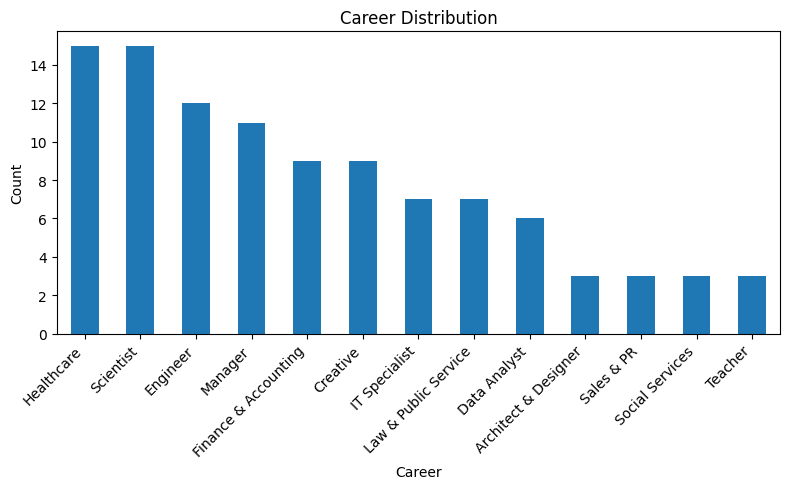

In [905]:


df_career['Career'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Career Distribution')
plt.xlabel('Career')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

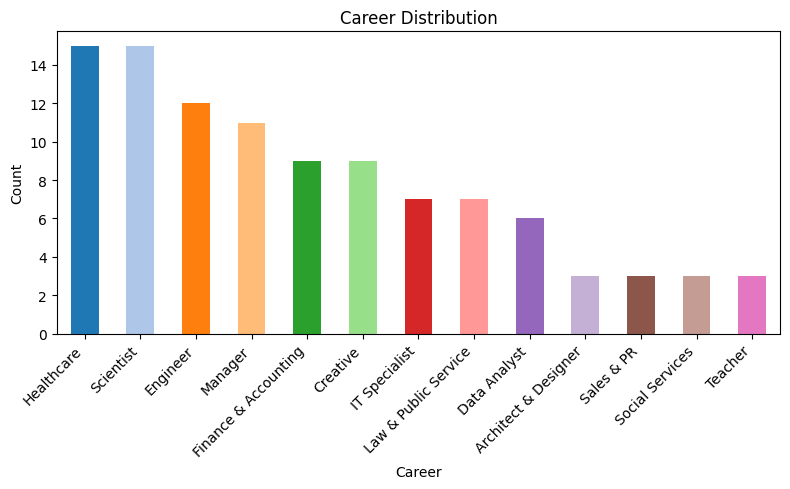

In [906]:
ax = df_career['Career'].value_counts().plot(
    kind='bar', 
    figsize=(8, 5), 
    color=plt.cm.tab20.colors  
)
plt.title('Career Distribution')
plt.xlabel('Career')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\modri\AppData\Local\Temp\ipykernel_24924\3114950605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_career, x='Career', order=df_career['Career'].value_counts().index, palette='tab20')


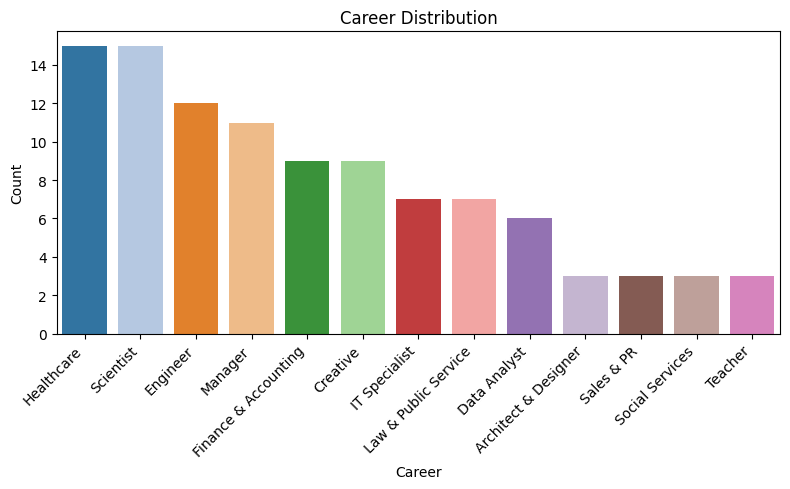

In [907]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df_career, x='Career', order=df_career['Career'].value_counts().index, palette='tab20')
plt.title('Career Distribution')
plt.xlabel('Career')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [908]:
ml_models = [
    "RandomForestClassifier",
    "KNeighborsClassifier",
    "SVC (Support Vector Machine)",
    "XGBClassifier (XGBoost)",
    "StackingClassifier (Meta-Model)",
    "Single-Feature RandomForest Ensemble",
    "KMeans (for unsupervised clustering)"
]
print(ml_models)

['RandomForestClassifier', 'KNeighborsClassifier', 'SVC (Support Vector Machine)', 'XGBClassifier (XGBoost)', 'StackingClassifier (Meta-Model)', 'Single-Feature RandomForest Ensemble', 'KMeans (for unsupervised clustering)']


In [909]:
print(len(df_synthetic_full))

1300


# Homepage

In [910]:


# Save the single-feature ensemble models dictionary to a file
#joblib.dump(models, 'career_single_feature_ensemble.pkl')

In [911]:
#tryout model sample
# Load the single-feature ensemble models dictionary
model = joblib.load('career_single_feature_ensemble.pkl')

# Prepare sample input
sample_input = [[4.7, 6.8, 4.6, 7.9, 8.3]]
feature_list = ['E_score', 'N_score', 'C_score', 'A_score', 'O_score']

# Get predicted probabilities from each single-feature model
probas = []
for i, feature in enumerate(feature_list):
    proba = model[feature].predict_proba([[sample_input[0][i]]])
    probas.append(proba)

# Combine probabilities by averaging
combined_proba = np.mean(probas, axis=0)

# Get final prediction
final_pred = np.argmax(combined_proba, axis=1)
class_names = model[feature_list[0]].classes_
predicted_label = class_names[final_pred[0]]

print("Predicted career:", predicted_label)

Predicted career: Sales & PR


c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\modri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skl

In [912]:
# streamlit run app.py
